In [26]:
import numpy as np
import pandas as pd

## Data Overview

In [27]:
df = pd.read_csv("../Data/preprocessed_osteoporosis.csv")
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
0,25-34,Osteoporosis,2010-03-16,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,Male,"Dizziness , lightheadedness , drowsiness, or ...",0,0,0
1,45-54,Post-Menopausal Osteoporosis Prevention,2017-07-31,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,Male,"Stomach upset, nausea / vomiting , bloating...",0,1,0
2,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1,1,1
3,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,Female,Constipation or stomach upset may occur.,1,0,1
4,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,Female,Constipation or stomach upset may occur.,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,55-64,Osteoporosis,2010-11-15,calcium 600 + vitamin d,93224,4,5,The only thing I have to say against these tab...,4,Female,Constipation or stomach upset may occur.,11,1,0
1353,55-64,Osteoporosis,2016-03-16,calcium 500 + vitamin d,151589,4,4,Just started taking this a month ago. Definite...,4,,Constipation or stomach upset may occur.,1,1,0
1354,55-64,Osteoporosis,2012-03-08,calcitrate + vit d,19844,3,3,"This supplement has caused much gas, bloating,...",1,Female,Constipation or stomach upset may occur.,2,1,0
1355,65-74,Osteoporosis,2012-07-24,calcitrate,22129,1,1,first dose: one tablet knocked me out cold for...,1,Female,Constipation and upset stomach may occur.,1,1,0


In [28]:
bin_age = []



for age in df['Age']:

    if age == '7-12':

        bin_age.append('0-44')

    elif age == '13-18':

        bin_age.append('0-44')

    elif age == '19-24':

        bin_age.append('0-44')

    elif age == '25-34':

        bin_age.append('0-44')

    elif age == '35-44':

        bin_age.append('0-44')

    elif age == '45-54':

        bin_age.append('45-54')

    elif age == '55-64':

        bin_age.append('55-64')

    elif age == '65-74':

        bin_age.append('65-74')

    elif age == '75 or over':

        bin_age.append('75+')

    else:

        #Combine missing values into the most frequent bin

        bin_age.append('')



df['Age'] = bin_age

## Exploratory Data Analysis

### Distribution of Reviews about Effectiveness

In [29]:
#have as probabilities instead of 0 or 1
df_effectiveness = df[df["effectiveness"]==1]
df_effectiveness

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
2,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1,1,1
3,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,Female,Constipation or stomach upset may occur.,1,0,1
6,45-54,Osteoporosis,2012-08-27,os-cal 500-vit d3,16527,5,3,I have taken it for 6 months and it did not in...,1,Male,Constipation or stomach upset may occur.,2,1,1
11,55-64,Post-Menopausal Osteoporosis Prevention,2008-02-13,"menostar patch, transdermal weekly",91304,5,5,I have been on menostar for three years and lo...,5,Female,Skin redness/irritation at the application si...,2,1,1
19,55-64,Post-Menopausal Osteoporosis Prevention,2013-08-13,"minivelle patch, transdermal semiweekly",162872,4,1,I switched to minivelle in February just got m...,1,Female,Skin redness/irritation at the application si...,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,45-54,Osteoporosis,2008-08-05,c calcium,64799,5,5,I had lower back pain for 18 years. Five days ...,5,Female,Constipation and upset stomach may occur.,6,1,1
1345,55-64,Osteoporosis,2013-07-18,calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet,2115,4,5,I started using this supplement for achy legs....,5,Female,,1,1,1
1347,65-74,Osteoporosis,2015-10-03,"calcium 600 mg (1,500 mg) tablet",4155,5,4,"Unable to take Statins, major cramping in legs...",3,Female,Constipation and upset stomach may occur.,2,1,1
1349,65-74,Post-Menopausal Osteoporosis Prevention,2010-02-12,calcium 600 with soy,74961,5,5,I started taking this more than 10 years ago a...,5,Female,,1,1,1


In [30]:
#age distribution of reviews about effectiveness
f1 = df_effectiveness.groupby("Age").count().reset_index()[["Age", "effectiveness"]]
f1 = f1.iloc[1:]
f1.columns=["Age Group","Count of Reviews"]
f1

,Age Group,Count of Reviews
1,0-44,17
2,45-54,109
3,55-64,253
4,65-74,149
5,75+,43


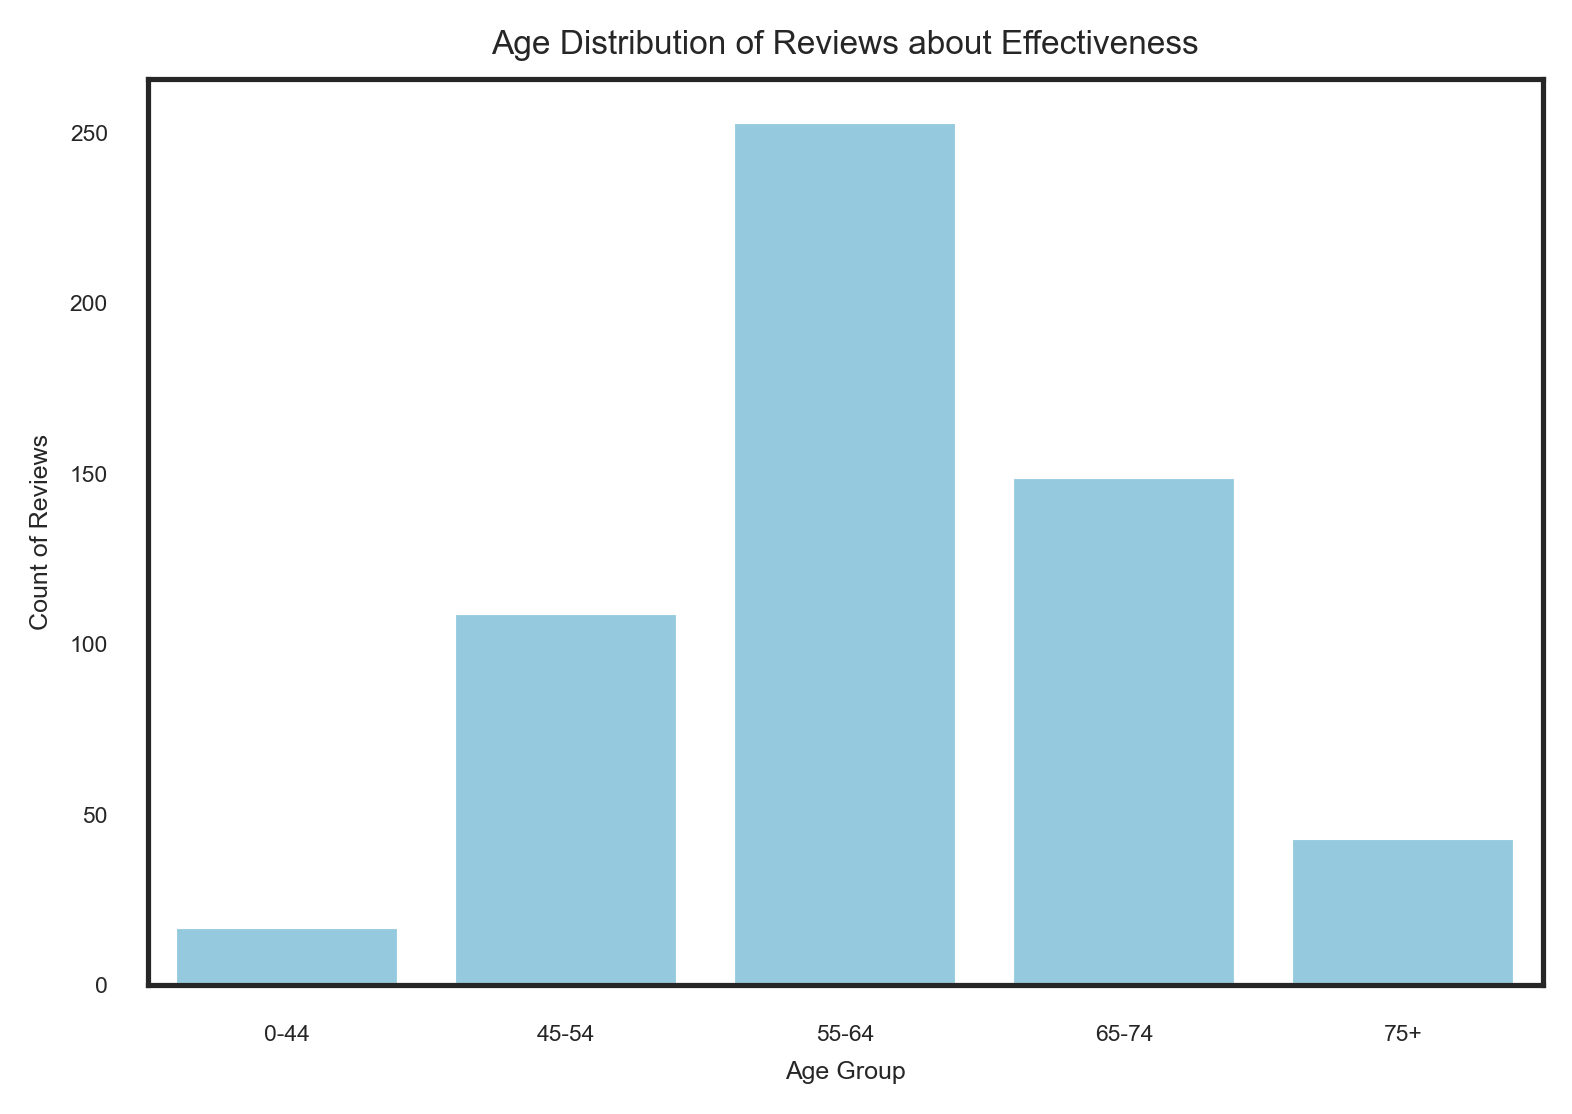

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set up parameters
# sns.set_context('paper')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300},
        font_scale=0.5,
        style="white"
        )

#plot barchart
sns.barplot(x = 'Age Group', y = 'Count of Reviews', data = f1, color="skyblue")

#set title
plt.title('Age Distribution of Reviews about Effectiveness', fontsize=8)

#save the figure
plt.savefig('../Results/age_distribution_of_reviews_about_effectiveness.jpg')

# Effectiveness and Good vs Bad Review

In [32]:
bad_effective_df = df_effectiveness[df_effectiveness['Satisfaction']<3]
bad_effective_df.sort_values(['Age'], ascending=[True])

good_effective_df = df_effectiveness[df_effectiveness['Satisfaction'] >3]
good_effective_df.sort_values(['Age'], ascending=[True])

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
175,,Osteoporosis,2015-05-05,prolia syringe,154218,5,5,I am very satisfied with Prolia which I have b...,5,Female,,43,1,1
1243,,Post-Menopausal Osteoporosis Prevention,2009-03-31,fosamax,1273,5,5,I have had no problems with this medication ho...,5,,"Stomach pain , constipation , diarrhea , gas...",8,1,1
563,0-44,Osteoporosis,2011-07-08,"reclast bottle, infusion",148235,5,3,I had the infusion on June 6. Had the expected...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",12,1,1
603,0-44,Osteoporosis,2010-11-22,"reclast bottle, infusion",148235,5,5,I too almost canceled my infusion after readin...,5,,"Nausea , tiredness, flu -like symptoms (e.g.,...",50,1,1
21,0-44,Post-Menopausal Osteoporosis Prevention,2016-08-14,mimvey,154151,5,5,I am on my 4th year of taking this medication....,5,,"Stomach upset, nausea / vomiting , bloating...",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,75+,Osteoporosis,2009-05-12,actonel tablet osteoporosis agents,16383,5,5,A MALE WITH OSTEOPENIA\r\nHAVE BEEN TAKING ACT...,5,Male,Upset stomach may occur.,8,1,1
161,75+,Osteoporosis,2015-07-24,prolia syringe,154218,5,4,I have experienced no side effects or problems...,4,Female,,25,1,1
1018,75+,Osteoporosis,2008-07-07,actonel 35 mg tablet,16383,5,4,Seems to work for me according to my doctor an...,5,Female,Stomach upset may occur.,13,1,1
150,75+,Osteoporosis in Men due to Deficient Function ...,2015-09-12,prolia syringe,154218,5,5,Took Reclast infusions for 3 years annually. H...,5,Female,,6,1,1


<AxesSubplot:xlabel='Age', ylabel='count'>

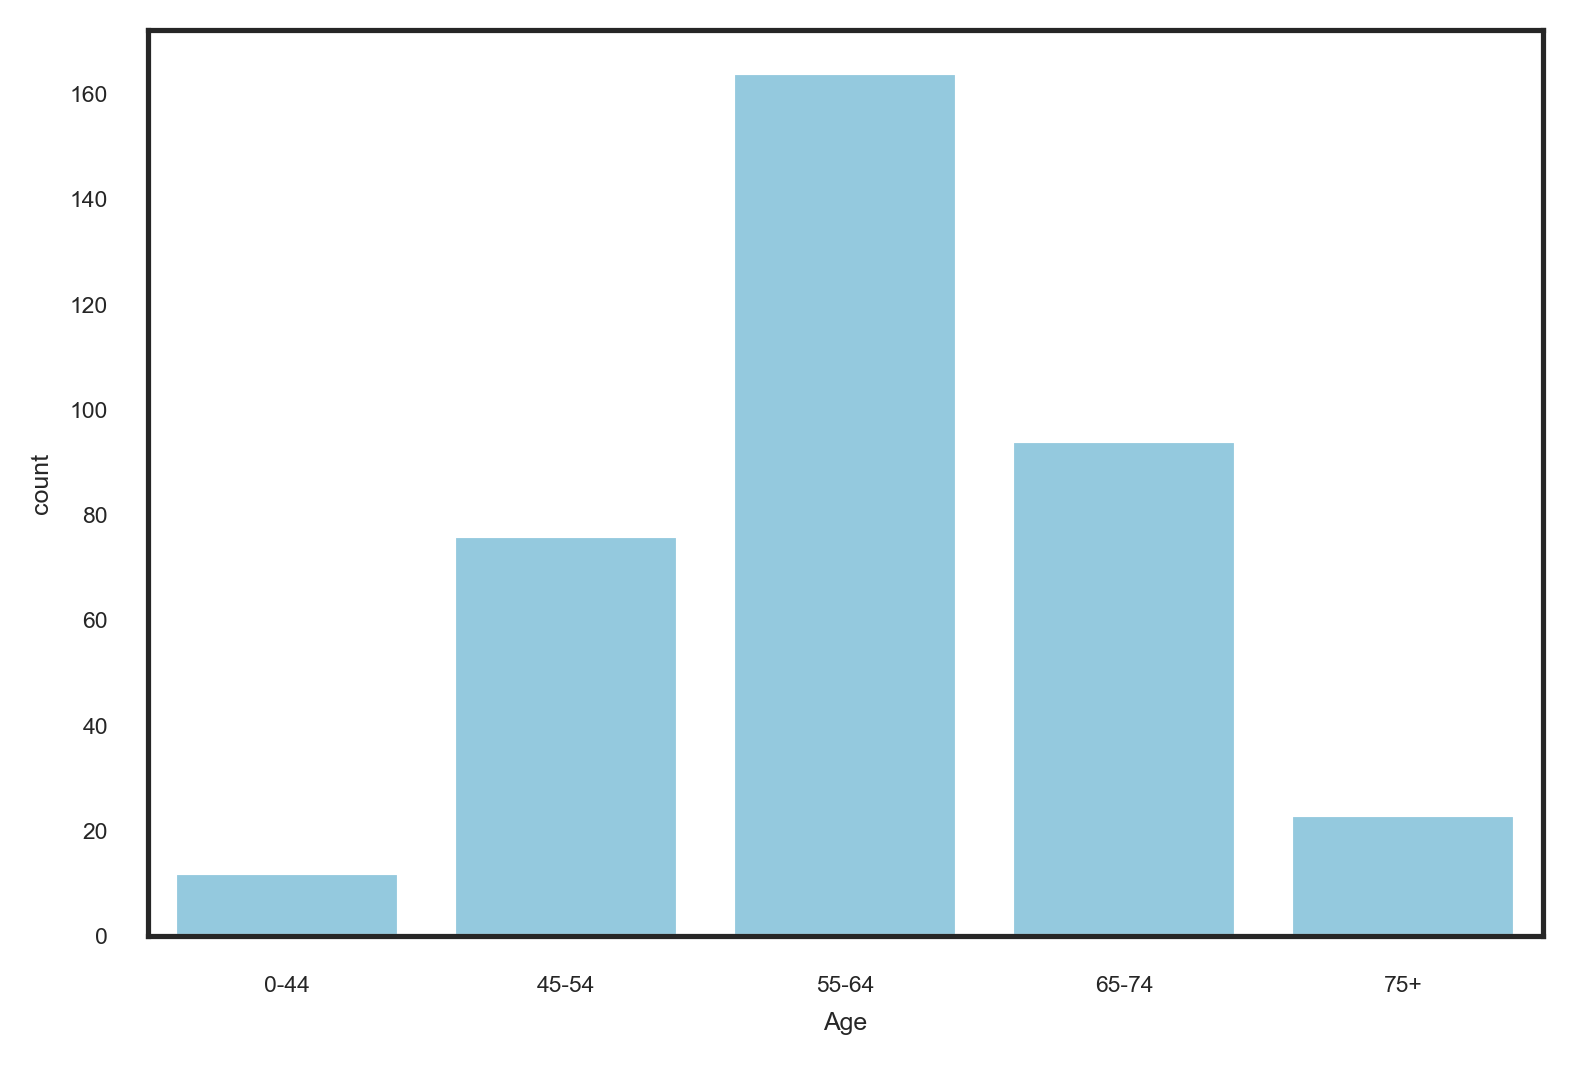

In [33]:
sns.countplot(x='Age', data = good_effective_df, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

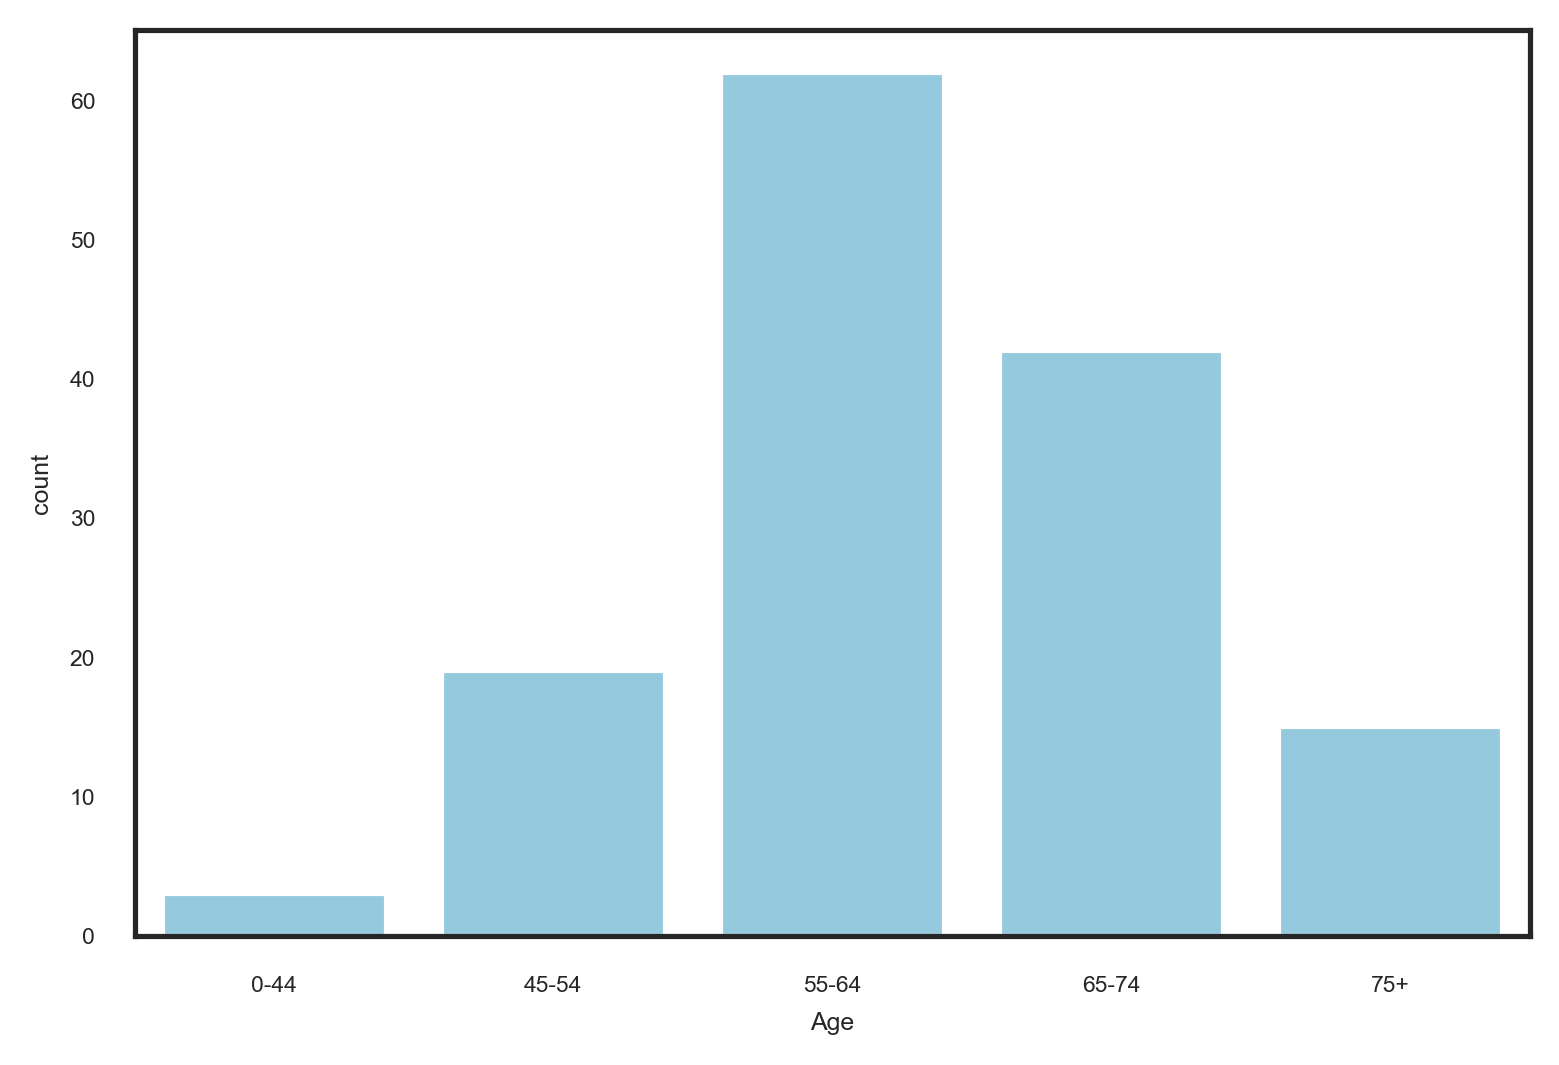

In [34]:
sns.countplot(x='Age', data = bad_effective_df, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

### Distribution of Reviews about Side Effects

In [35]:
df_side_effects = df[df["side_effect"]==1]
df_side_effects

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
1,45-54,Post-Menopausal Osteoporosis Prevention,2017-07-31,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,Male,"Stomach upset, nausea / vomiting , bloating...",0,1,0
2,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1,1,1
4,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,Female,Constipation or stomach upset may occur.,2,1,0
5,75+,Osteoporosis,2015-02-23,os-cal 500-vit d3,16527,1,3,Food dyes and talc...large pill for a newly re...,1,Female,Constipation or stomach upset may occur.,1,1,0
6,45-54,Osteoporosis,2012-08-27,os-cal 500-vit d3,16527,5,3,I have taken it for 6 months and it did not in...,1,Male,Constipation or stomach upset may occur.,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,55-64,Osteoporosis,2010-11-15,calcium 600 + vitamin d,93224,4,5,The only thing I have to say against these tab...,4,Female,Constipation or stomach upset may occur.,11,1,0
1353,55-64,Osteoporosis,2016-03-16,calcium 500 + vitamin d,151589,4,4,Just started taking this a month ago. Definite...,4,,Constipation or stomach upset may occur.,1,1,0
1354,55-64,Osteoporosis,2012-03-08,calcitrate + vit d,19844,3,3,"This supplement has caused much gas, bloating,...",1,Female,Constipation or stomach upset may occur.,2,1,0
1355,65-74,Osteoporosis,2012-07-24,calcitrate,22129,1,1,first dose: one tablet knocked me out cold for...,1,Female,Constipation and upset stomach may occur.,1,1,0


In [36]:
#age distribution of reviews about side effects
f2 = df_side_effects.groupby("Age").count().reset_index()[["Age", "side_effect"]]
f2 = f2.iloc[1:]
f2.columns=["Age Group","Count of Reviews"]
f2

,Age Group,Count of Reviews
1,0-44,46
2,45-54,265
3,55-64,531
4,65-74,334
5,75+,123


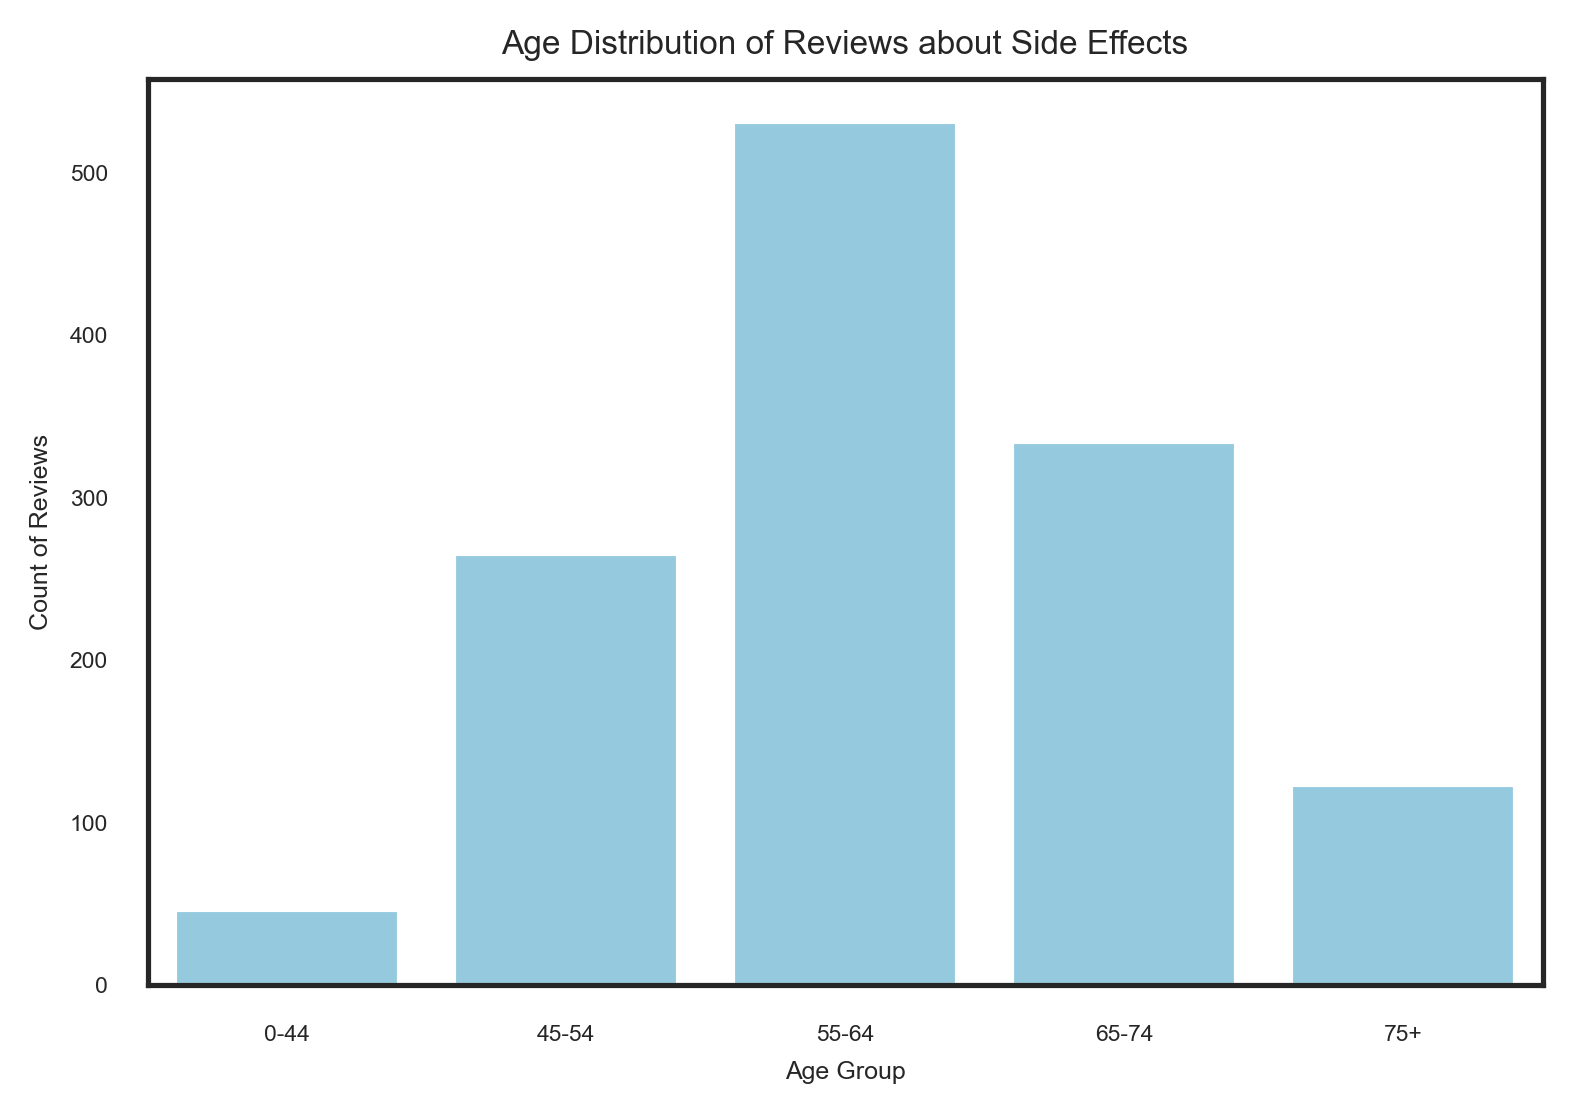

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set up parameters
# sns.set_context('paper')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300},
        font_scale=0.5,
        style="white"
        )

#plot barchart
sns.barplot(x = 'Age Group', y = 'Count of Reviews', data = f2, color = 'skyblue')

#set title
plt.title('Age Distribution of Reviews about Side Effects', fontsize=8)

#save the figure
plt.savefig('../Results/age_distribution_of_reviews_about_side_effects.jpg')

# Side effects and Good vs Bad Reviews

In [38]:
bad_side_df = df_side_effects[df_side_effects['Satisfaction']<3]
bad_side_df.sort_values(['Age'], ascending=[True])

good_side_df = df_side_effects[df_side_effects['Satisfaction'] >3]
good_side_df.sort_values(['Age'], ascending=[True])

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
175,,Osteoporosis,2015-05-05,prolia syringe,154218,5,5,I am very satisfied with Prolia which I have b...,5,Female,,43,1,1
1243,,Post-Menopausal Osteoporosis Prevention,2009-03-31,fosamax,1273,5,5,I have had no problems with this medication ho...,5,,"Stomach pain , constipation , diarrhea , gas...",8,1,1
1067,0-44,Osteoporosis,2009-01-22,actonel tablet osteoporosis agents,16383,5,4,I a 29 year old female who loves to run and I ...,4,Female,Upset stomach may occur.,10,1,1
563,0-44,Osteoporosis,2011-07-08,"reclast bottle, infusion",148235,5,3,I had the infusion on June 6. Had the expected...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",12,1,1
1095,0-44,Post-Menopausal Osteoporosis Prevention,2013-02-15,estradiol,5186,5,5,I had a complete hysterectomy in Jan. 2007 at ...,5,Female,"Stomach upset, nausea / vomiting , bloating...",3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,75+,Osteoporosis,2012-07-06,"reclast bottle, infusion",148235,5,5,after three infusions I no longer need medicat...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",22,1,1
645,75+,Osteoporosis,2010-06-30,"reclast bottle, infusion",148235,5,5,Had difficulty with the pills...mostly having ...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",27,1,1
880,75+,Post-Menopausal Osteoporosis Prevention,2007-10-20,alendronate sodium tablet,1257,4,4,Cost keeps going up! After 8 years would\r\ni...,4,Female,"Stomach pain , constipation , diarrhea , gas...",16,1,0
888,75+,Osteoporosis,2014-09-22,atelvia,154925,4,4,I took Forteo to build up my bones and Atelvia...,4,Female,"Stomach / abdominal pain , nausea , vomiting...",5,1,1


<AxesSubplot:xlabel='Age', ylabel='count'>

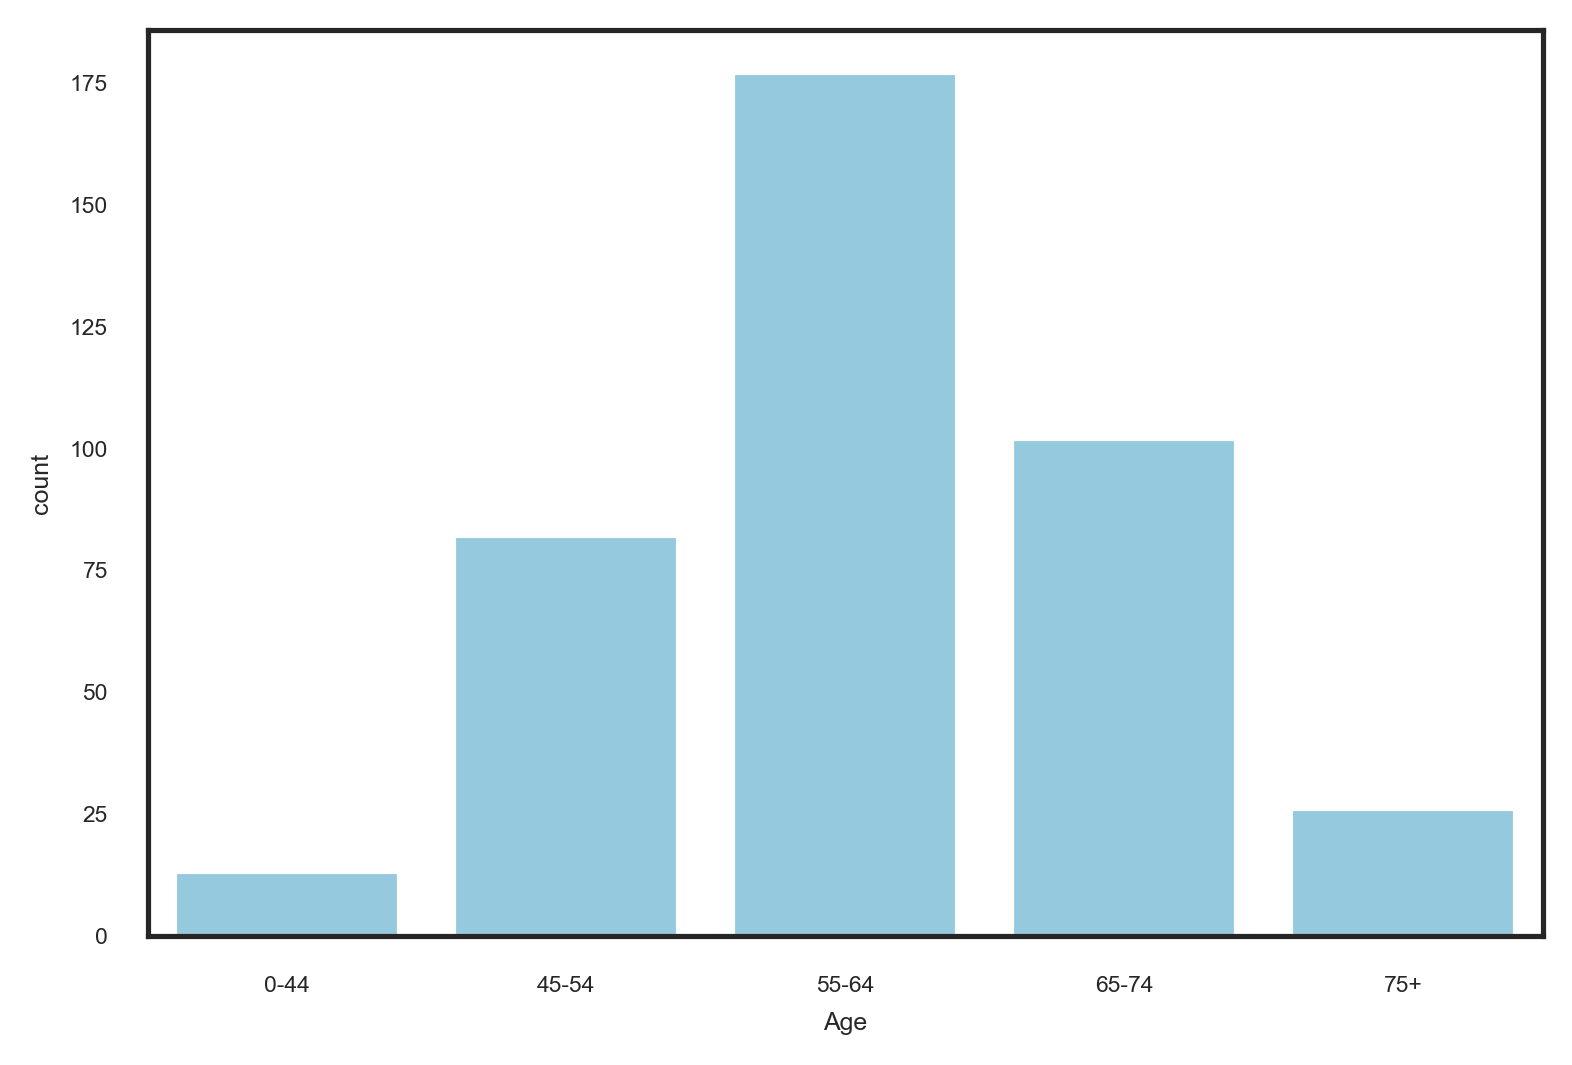

In [39]:
sns.countplot(x='Age', data = good_side_df, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

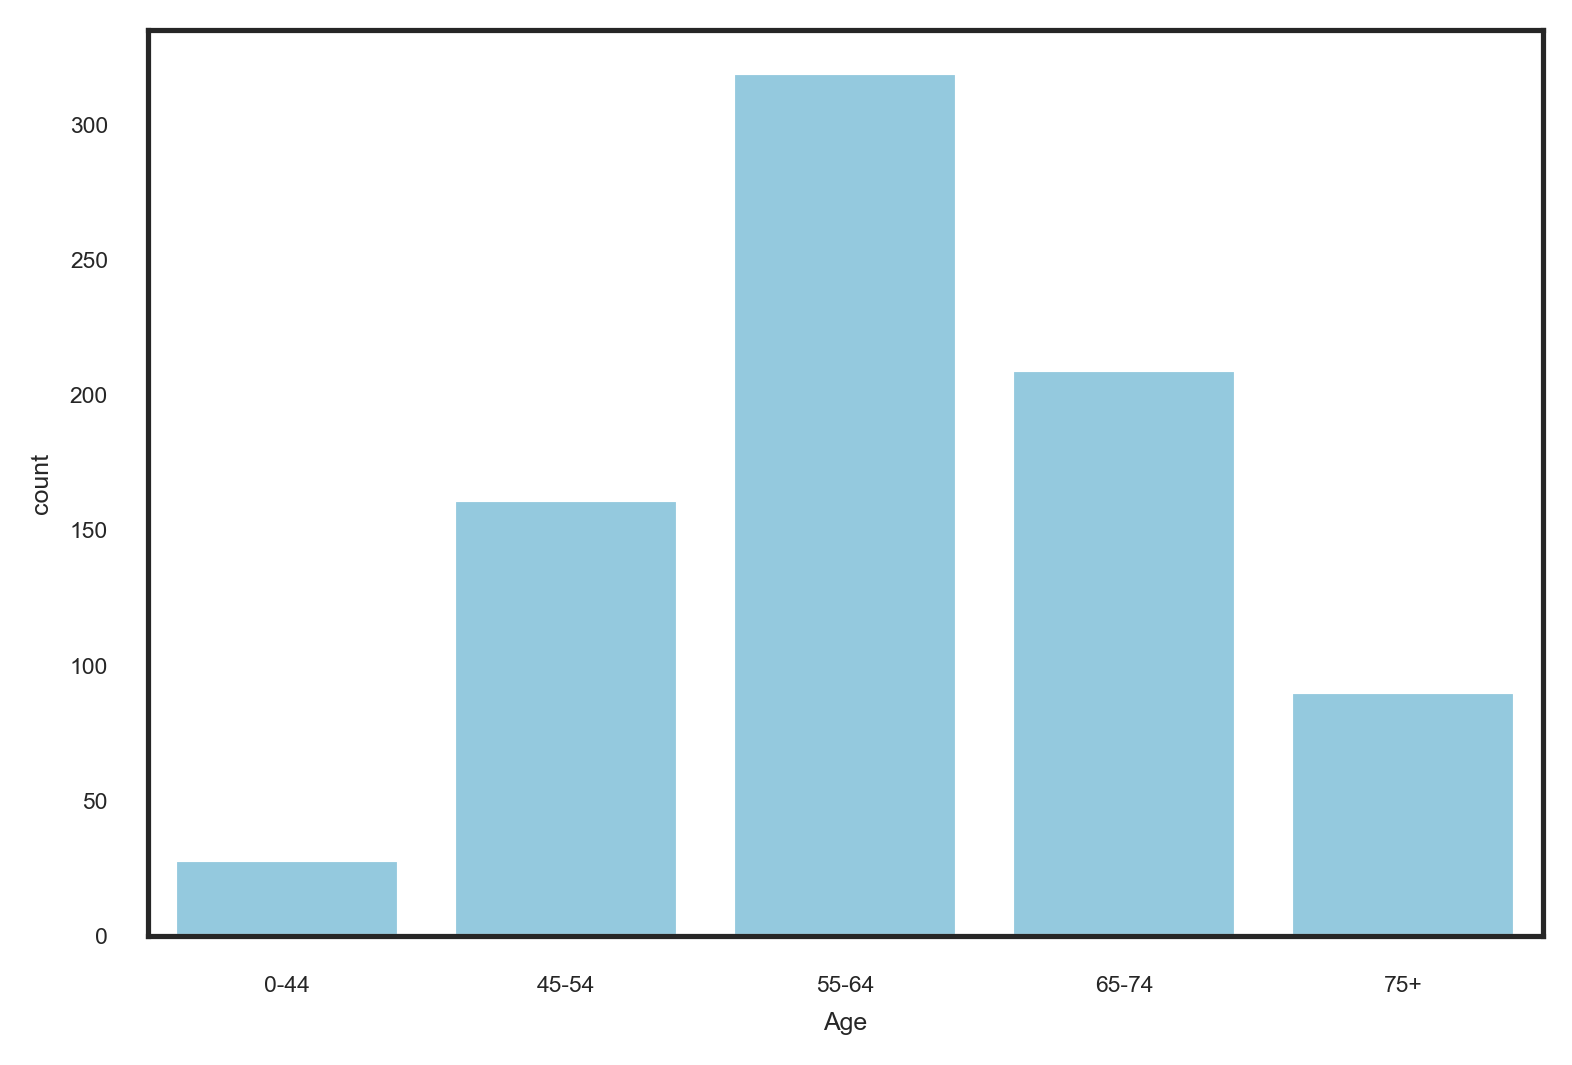

In [40]:
sns.countplot(x='Age', data = bad_side_df, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

### Distribution of Reviews about Effectiveness + Side Effects

In [41]:
df_both = df.loc[(df["side_effect"]==1) & (df["effectiveness"]==1)]
df_both

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
2,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1,1,1
6,45-54,Osteoporosis,2012-08-27,os-cal 500-vit d3,16527,5,3,I have taken it for 6 months and it did not in...,1,Male,Constipation or stomach upset may occur.,2,1,1
11,55-64,Post-Menopausal Osteoporosis Prevention,2008-02-13,"menostar patch, transdermal weekly",91304,5,5,I have been on menostar for three years and lo...,5,Female,Skin redness/irritation at the application si...,2,1,1
19,55-64,Post-Menopausal Osteoporosis Prevention,2013-08-13,"minivelle patch, transdermal semiweekly",162872,4,1,I switched to minivelle in February just got m...,1,Female,Skin redness/irritation at the application si...,1,1,1
20,45-54,Post-Menopausal Osteoporosis Prevention,2013-06-18,"minivelle patch, transdermal semiweekly",162872,1,1,I have been on Vivelle Dot 0.075 for four year...,1,Female,Skin redness/irritation at the application si...,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,45-54,Osteoporosis,2008-08-05,c calcium,64799,5,5,I had lower back pain for 18 years. Five days ...,5,Female,Constipation and upset stomach may occur.,6,1,1
1345,55-64,Osteoporosis,2013-07-18,calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet,2115,4,5,I started using this supplement for achy legs....,5,Female,,1,1,1
1347,65-74,Osteoporosis,2015-10-03,"calcium 600 mg (1,500 mg) tablet",4155,5,4,"Unable to take Statins, major cramping in legs...",3,Female,Constipation and upset stomach may occur.,2,1,1
1349,65-74,Post-Menopausal Osteoporosis Prevention,2010-02-12,calcium 600 with soy,74961,5,5,I started taking this more than 10 years ago a...,5,Female,,1,1,1


In [42]:
#age distribution of reviews about side effects+effectiveness
f3  = df_both.groupby("Age").count().reset_index()[["Age", "side_effect"]]
f3 = f3.iloc[1:]
f3.columns=["Age Group","Count of Reviews"]
f3

,Age Group,Count of Reviews
1,0-44,16
2,45-54,109
3,55-64,250
4,65-74,143
5,75+,43


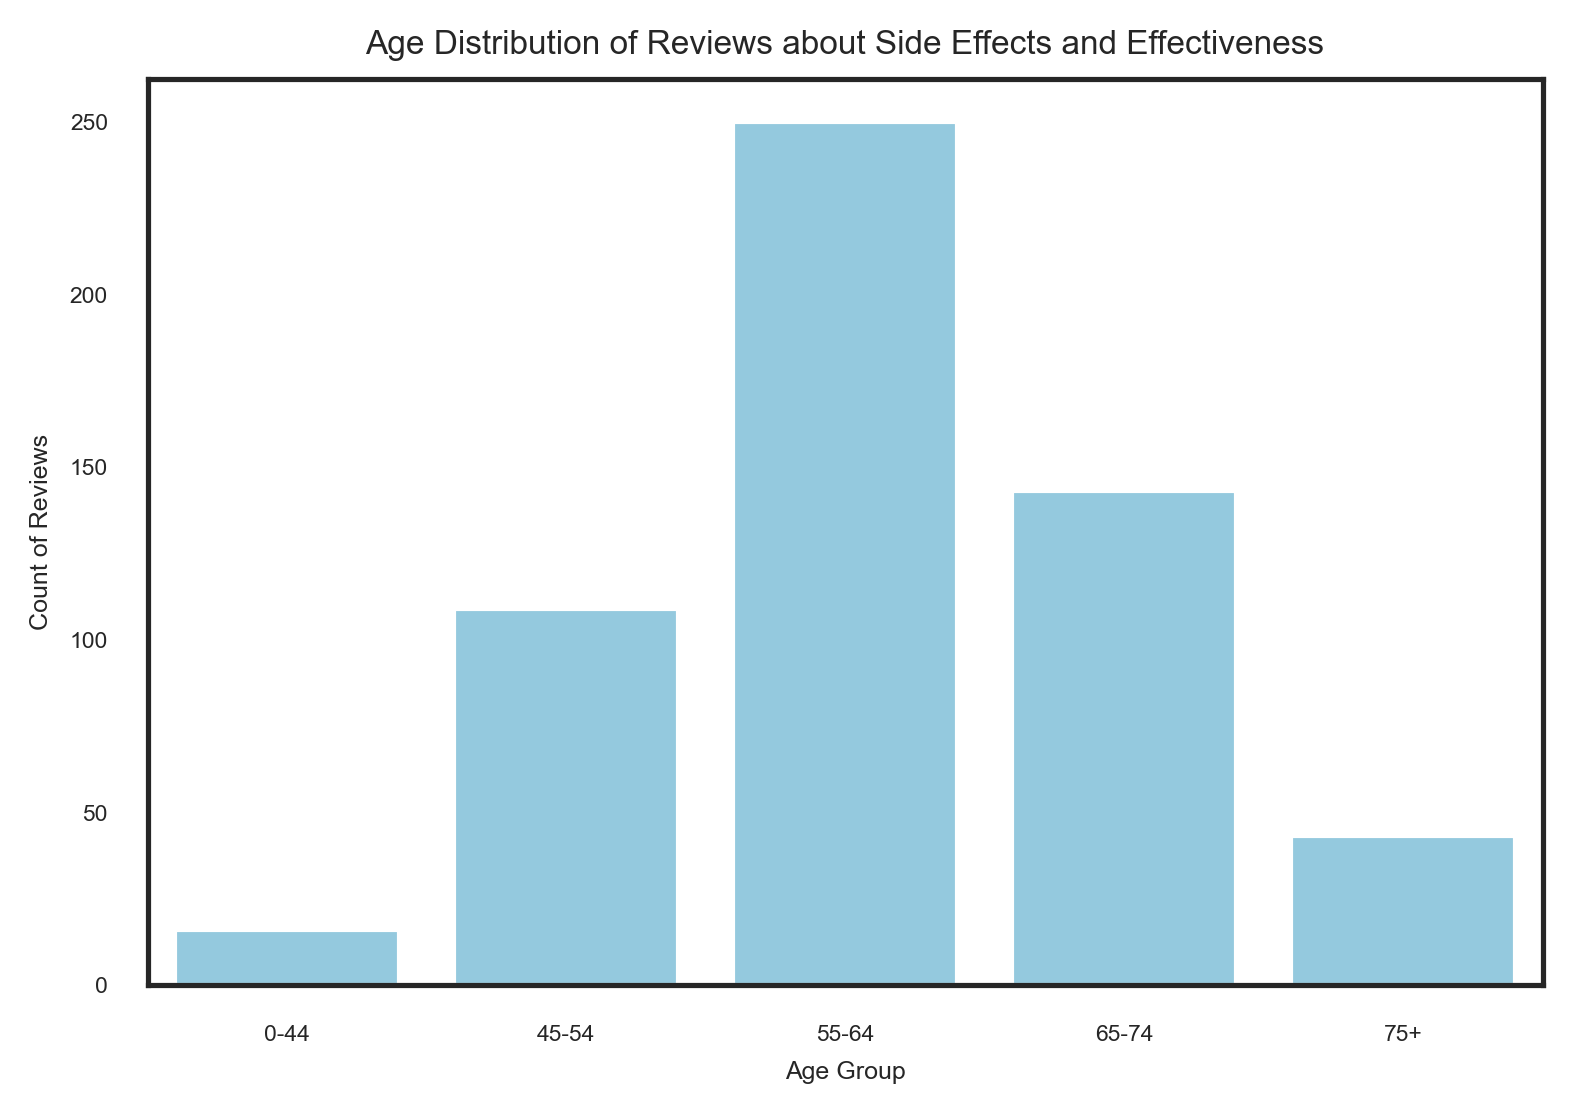

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set up parameters
# sns.set_context('paper')
sns.set(style="white",
        font_scale=0.5, 
        rc={"figure.dpi":300, 'savefig.dpi':300},
        )

#plot barchart
sns.barplot(x = 'Age Group', y = 'Count of Reviews', data = f3, color = 'skyblue')

#set title
plt.title('Age Distribution of Reviews about Side Effects and Effectiveness', fontsize=8)

#save the figure
plt.savefig('../Results/age_distribution_of_reviews_both.jpg')

#bigrams of negatiave reviews with effectiveness + neg reviews with side effects to see what people are talking about, market influential reviews.
#do a similar tuning to identify specific side effects // more language modeling (?) ie tune a language model on generally observed side effects 
#(using Opal's few shot classifier to find out what reviews are aobut side effects and doing some mining using Blaise's code to group side effects, use a new model that has been tuned to recluster the data into the specific side effects)
#Analysis for Radius specifically (sentence similarity to find which drugs are similar to Radius)

### Distribution of Positive/Negative Reviews about Effectiveness

The threshold of satisfaction for defining negative/positive is 2.

In [44]:
df_eff_neg = df_effectiveness[df_effectiveness["Satisfaction"]<2]#negative reviews about effectiveness
df_eff_neg

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
6,45-54,Osteoporosis,2012-08-27,os-cal 500-vit d3,16527,5,3,I have taken it for 6 months and it did not in...,1,Male,Constipation or stomach upset may occur.,2,1,1
19,55-64,Post-Menopausal Osteoporosis Prevention,2013-08-13,"minivelle patch, transdermal semiweekly",162872,4,1,I switched to minivelle in February just got m...,1,Female,Skin redness/irritation at the application si...,1,1,1
20,45-54,Post-Menopausal Osteoporosis Prevention,2013-06-18,"minivelle patch, transdermal semiweekly",162872,1,1,I have been on Vivelle Dot 0.075 for four year...,1,Female,Skin redness/irritation at the application si...,2,1,1
24,55-64,Osteoporosis,2020-02-24,prolia syringe,154218,1,1,DO NOT LET ANY DOCTOR TALK YOU INTO A PROLIO S...,1,,,2,0,1
34,65-74,Osteoporosis,2019-08-22,prolia syringe,154218,5,5,It seems that I have developed Secondary Hyper...,1,Female,,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,55-64,Post-Menopausal Osteoporosis Prevention,2011-03-14,boniva,92884,1,1,I've been taking oral Boniva monthly for about...,1,Female,"Stomach upset, diarrhea , pain in arms/legs,...",0,1,1
1304,55-64,Post-Menopausal Osteoporosis Prevention,2008-05-05,boniva,92884,1,1,On the fourth day after taking this drug I fel...,1,Female,"Stomach upset, diarrhea , pain in arms/legs,...",24,1,1
1305,45-54,Post-Menopausal Osteoporosis Prevention,2008-04-16,boniva,92884,4,1,Have taken 3 doses. I do not yet know how eff...,1,Female,"Stomach upset, diarrhea , pain in arms/legs,...",21,1,1
1307,55-64,Post-Menopausal Osteoporosis Prevention,2008-03-15,boniva,92884,3,1,Took first dose in 2/07. First 3 months went ...,1,Female,"Stomach upset, diarrhea , pain in arms/legs,...",32,1,1


In [45]:
#age distribution of negative reviews about effectiveness
f4  = df_eff_neg.groupby("Age").count().reset_index()[["Age", "side_effect"]]
f4 = f4.iloc[1:]
f4.columns=["Age Group","Count of Reviews"]
f4

,Age Group,Count of Reviews
1,0-44,2
2,45-54,14
3,55-64,52
4,65-74,37
5,75+,14


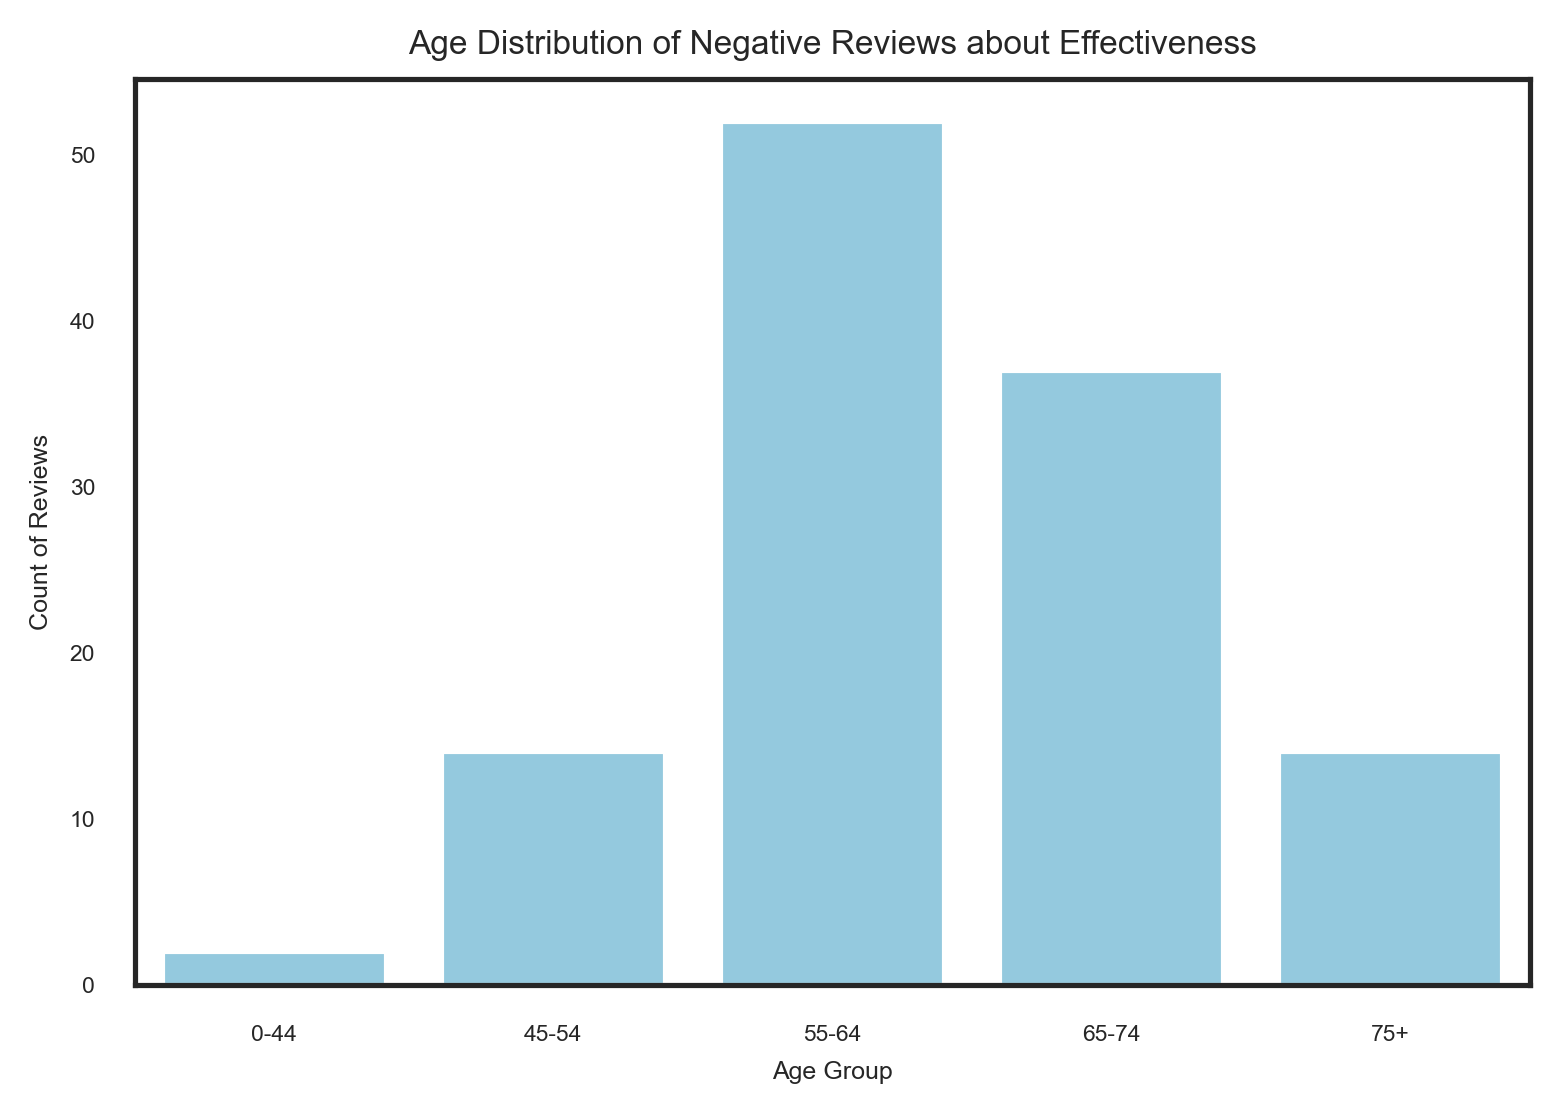

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set up parameters
# sns.set_context('paper')
sns.set(style="white",
        font_scale=0.5, 
        rc={"figure.dpi":300, 'savefig.dpi':300},
        )

#plot barchart
sns.barplot(x = 'Age Group', y = 'Count of Reviews', data = f4,color = 'skyblue')

#set title
plt.title('Age Distribution of Negative Reviews about Effectiveness', fontsize=8)
# plt.show()
# #save the figure
plt.savefig('../Results/age_distribution_of_negative_reviews_effectiveness.jpg')

In [47]:
df_eff_pos = df_effectiveness[df_effectiveness["Satisfaction"]>=2]#positive reviews about effectiveness
df_eff_pos

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
2,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1,1,1
3,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,Female,Constipation or stomach upset may occur.,1,0,1
11,55-64,Post-Menopausal Osteoporosis Prevention,2008-02-13,"menostar patch, transdermal weekly",91304,5,5,I have been on menostar for three years and lo...,5,Female,Skin redness/irritation at the application si...,2,1,1
21,0-44,Post-Menopausal Osteoporosis Prevention,2016-08-14,mimvey,154151,5,5,I am on my 4th year of taking this medication....,5,,"Stomach upset, nausea / vomiting , bloating...",1,1,1
22,65-74,Post-Menopausal Osteoporosis Prevention,2013-10-10,mimvey,154151,5,5,Started it when I began having horrible hot fl...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,45-54,Osteoporosis,2008-08-05,c calcium,64799,5,5,I had lower back pain for 18 years. Five days ...,5,Female,Constipation and upset stomach may occur.,6,1,1
1345,55-64,Osteoporosis,2013-07-18,calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet,2115,4,5,I started using this supplement for achy legs....,5,Female,,1,1,1
1347,65-74,Osteoporosis,2015-10-03,"calcium 600 mg (1,500 mg) tablet",4155,5,4,"Unable to take Statins, major cramping in legs...",3,Female,Constipation and upset stomach may occur.,2,1,1
1349,65-74,Post-Menopausal Osteoporosis Prevention,2010-02-12,calcium 600 with soy,74961,5,5,I started taking this more than 10 years ago a...,5,Female,,1,1,1


In [48]:
#age distribution of positive reviews about effectiveness
f5  = df_eff_pos.groupby("Age").count().reset_index()[["Age", "side_effect"]]
f5 = f5.iloc[1:]
f5.columns=["Age Group","Count of Reviews"]
f5

,Age Group,Count of Reviews
1,0-44,15
2,45-54,95
3,55-64,201
4,65-74,112
5,75+,29


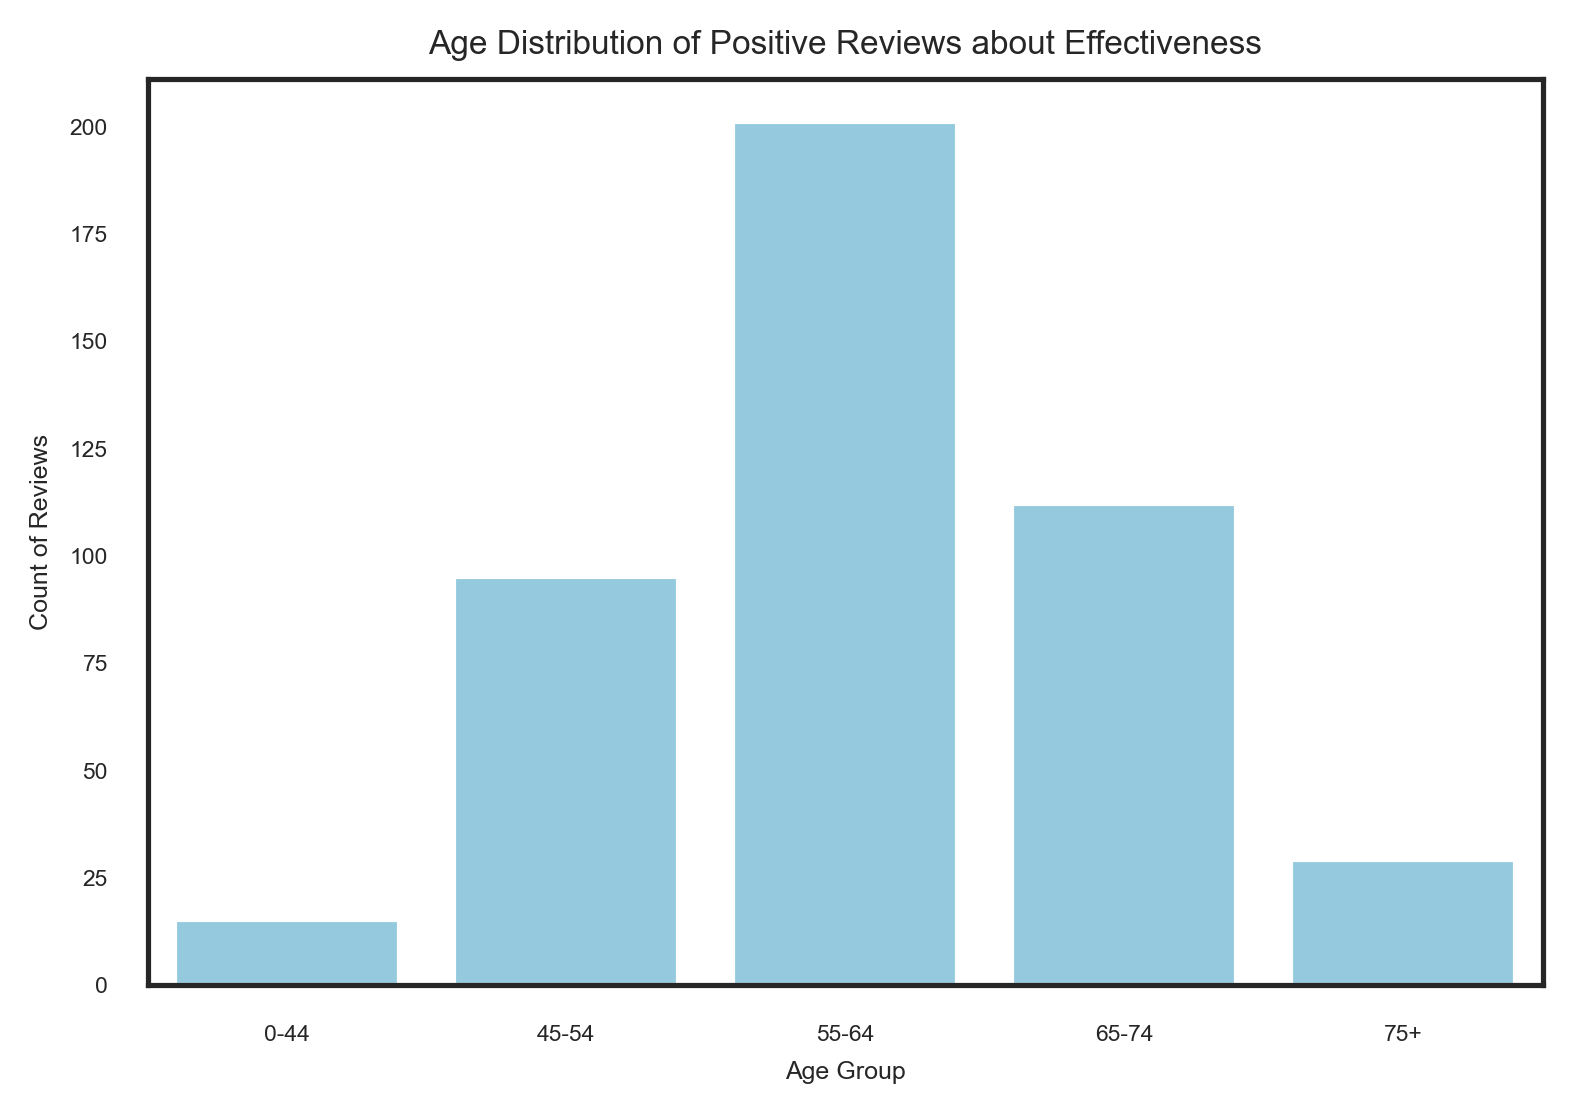

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set up parameters
#sns.set_context('paper')
sns.set(style="white",
        font_scale=0.5, 
        rc={"figure.dpi":300, 'savefig.dpi':300},
        )

#plot barchart
sns.barplot(x = 'Age Group', y = 'Count of Reviews', data = f5, color = 'skyblue')

#set title
plt.title('Age Distribution of Positive Reviews about Effectiveness', fontsize=8)
# plt.show()
# #save the figure
plt.savefig('../Results/age_distribution_of_positive_reviews_effectiveness.jpg')

In [50]:
#stacked positive and negative reviews about effectiveness across age groups
f4_tmp = f4.copy()
f4_tmp.columns = ["Age Group", "Count of Negative Reviews"]

f5_tmp = f5.copy()
f5_tmp.columns = ["Age Group", "Count of Positive Reviews"]

f10 = pd.merge(f4_tmp,f5_tmp, on="Age Group", how="outer")
f10

,Age Group,Count of Negative Reviews,Count of Positive Reviews
0,0-44,2,15
1,45-54,14,95
2,55-64,52,201
3,65-74,37,112
4,75+,14,29


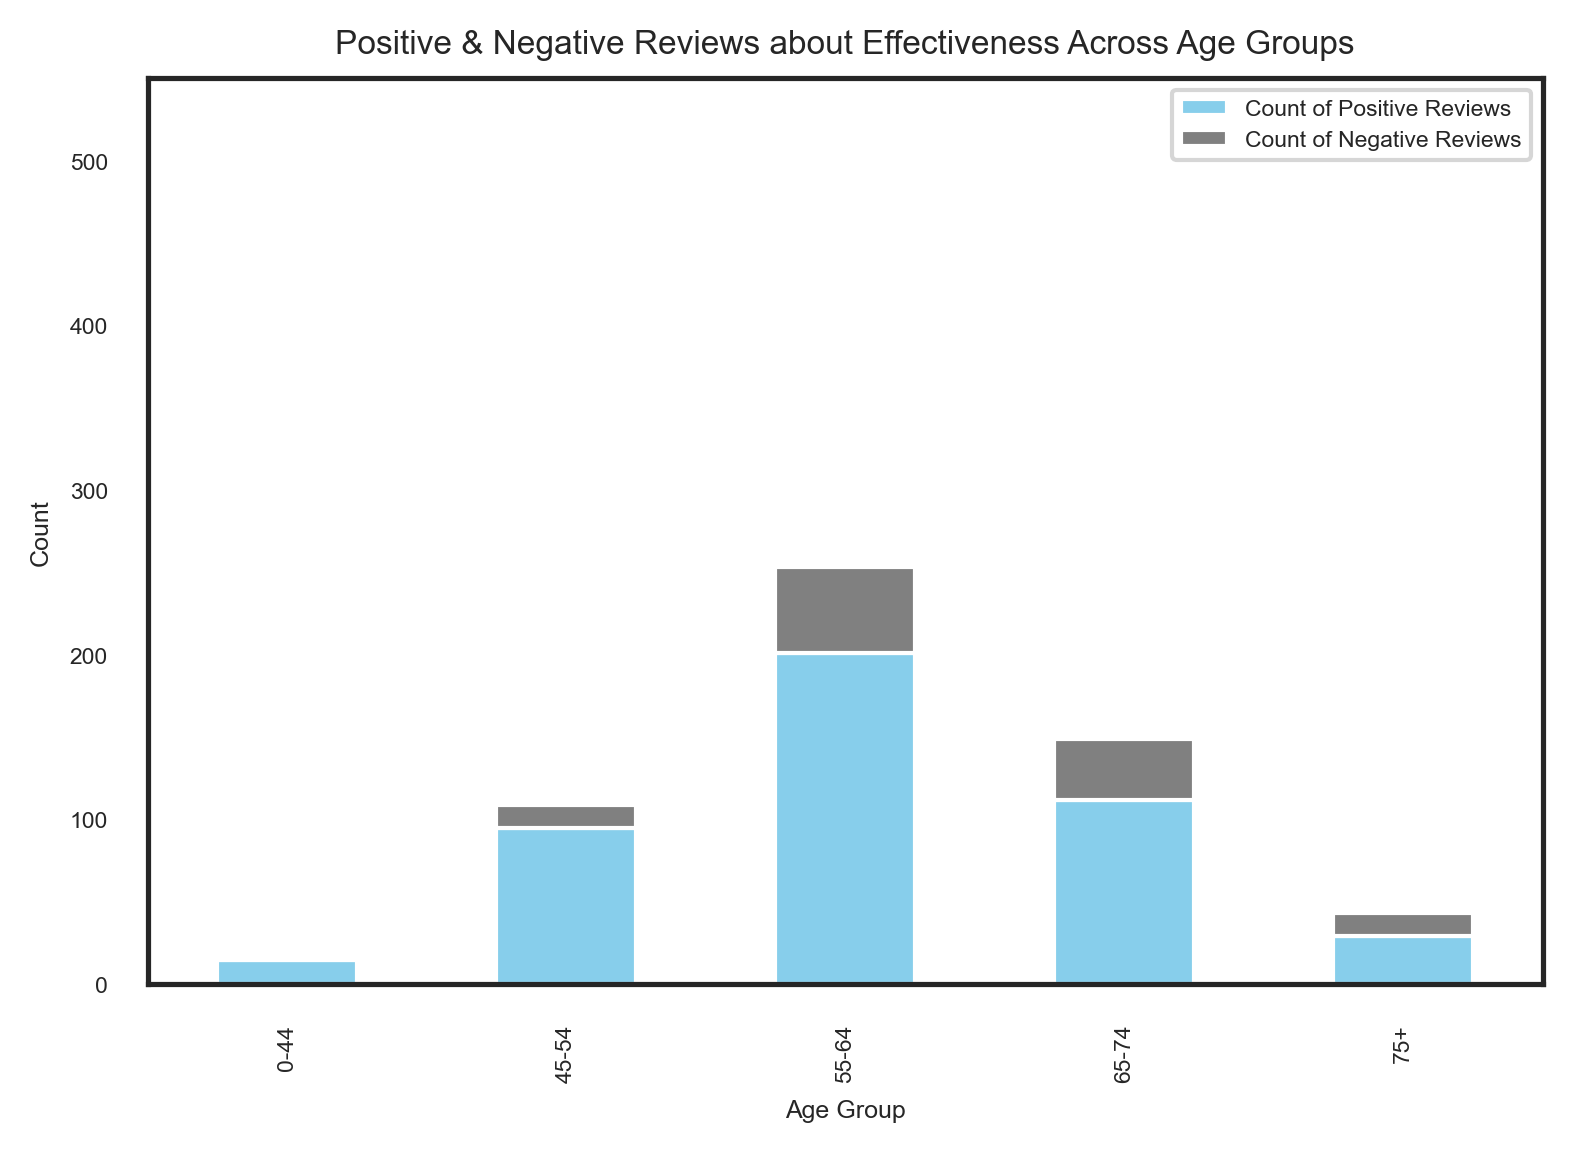

In [71]:
f10.plot(kind="bar", x="Age Group", y=["Count of Positive Reviews", "Count of Negative Reviews"], stacked=True, color=["skyblue", "gray"])
plt.title("Positive & Negative Reviews about Effectiveness Across Age Groups", fontsize=8)
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.ylim(0, 550)
plt.savefig("../Results/pos&neg_reviews_about_effectiveness_across_ages.png")

### Distribution of Positive/Negative Reviews about Side Effects

The threshold of satisfaction for defining negative/positive is 2.

In [52]:
df_side_neg = df_side_effects[df_side_effects["Satisfaction"]<2]#negative reviews about side effects
df_side_neg

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
4,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,Female,Constipation or stomach upset may occur.,2,1,0
5,75+,Osteoporosis,2015-02-23,os-cal 500-vit d3,16527,1,3,Food dyes and talc...large pill for a newly re...,1,Female,Constipation or stomach upset may occur.,1,1,0
6,45-54,Osteoporosis,2012-08-27,os-cal 500-vit d3,16527,5,3,I have taken it for 6 months and it did not in...,1,Male,Constipation or stomach upset may occur.,2,1,1
7,55-64,Osteoporosis,2009-06-17,os-cal 500-vit d3,16527,5,5,"I am 64 years old, and am trying to avoid loss...",1,Female,Constipation or stomach upset may occur.,9,1,0
13,55-64,Post-Menopausal Osteoporosis Prevention,2015-08-20,"minivelle patch, transdermal semiweekly",162872,1,1,Pharmacist switched from my Vivelle dot to thi...,1,Female,Skin redness/irritation at the application si...,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,65-74,Osteoporosis,2010-02-05,calcium citrate 200 mg (950 mg) tablet,8624,2,2,Marked laxative effect - am having to disconti...,1,Female,Constipation and upset stomach may occur.,28,1,0
1348,55-64,Post-Menopausal Osteoporosis Prevention,2012-08-18,"calcium 600 mg (1,500 mg) tablet",4155,1,2,"mouth pain couldn't wear denture, swollen joints",1,Female,Constipation and upset stomach may occur.,0,1,0
1351,55-64,Post-Menopausal Osteoporosis Prevention,2010-11-20,calcium 600 + vitamin d,93224,1,2,"Abdominal swelling, nausea, bone pain, sorenes...",1,Female,Constipation or stomach upset may occur.,0,1,0
1354,55-64,Osteoporosis,2012-03-08,calcitrate + vit d,19844,3,3,"This supplement has caused much gas, bloating,...",1,Female,Constipation or stomach upset may occur.,2,1,0


In [53]:
#age distribution of negative reviews about effectiveness
f6  = df_side_neg.groupby("Age").count().reset_index()[["Age", "side_effect"]]
f6 = f6.iloc[1:]
f6.columns=["Age Group","Count of Reviews"]
f6

,Age Group,Count of Reviews
1,0-44,26
2,45-54,141
3,55-64,287
4,65-74,197
5,75+,85


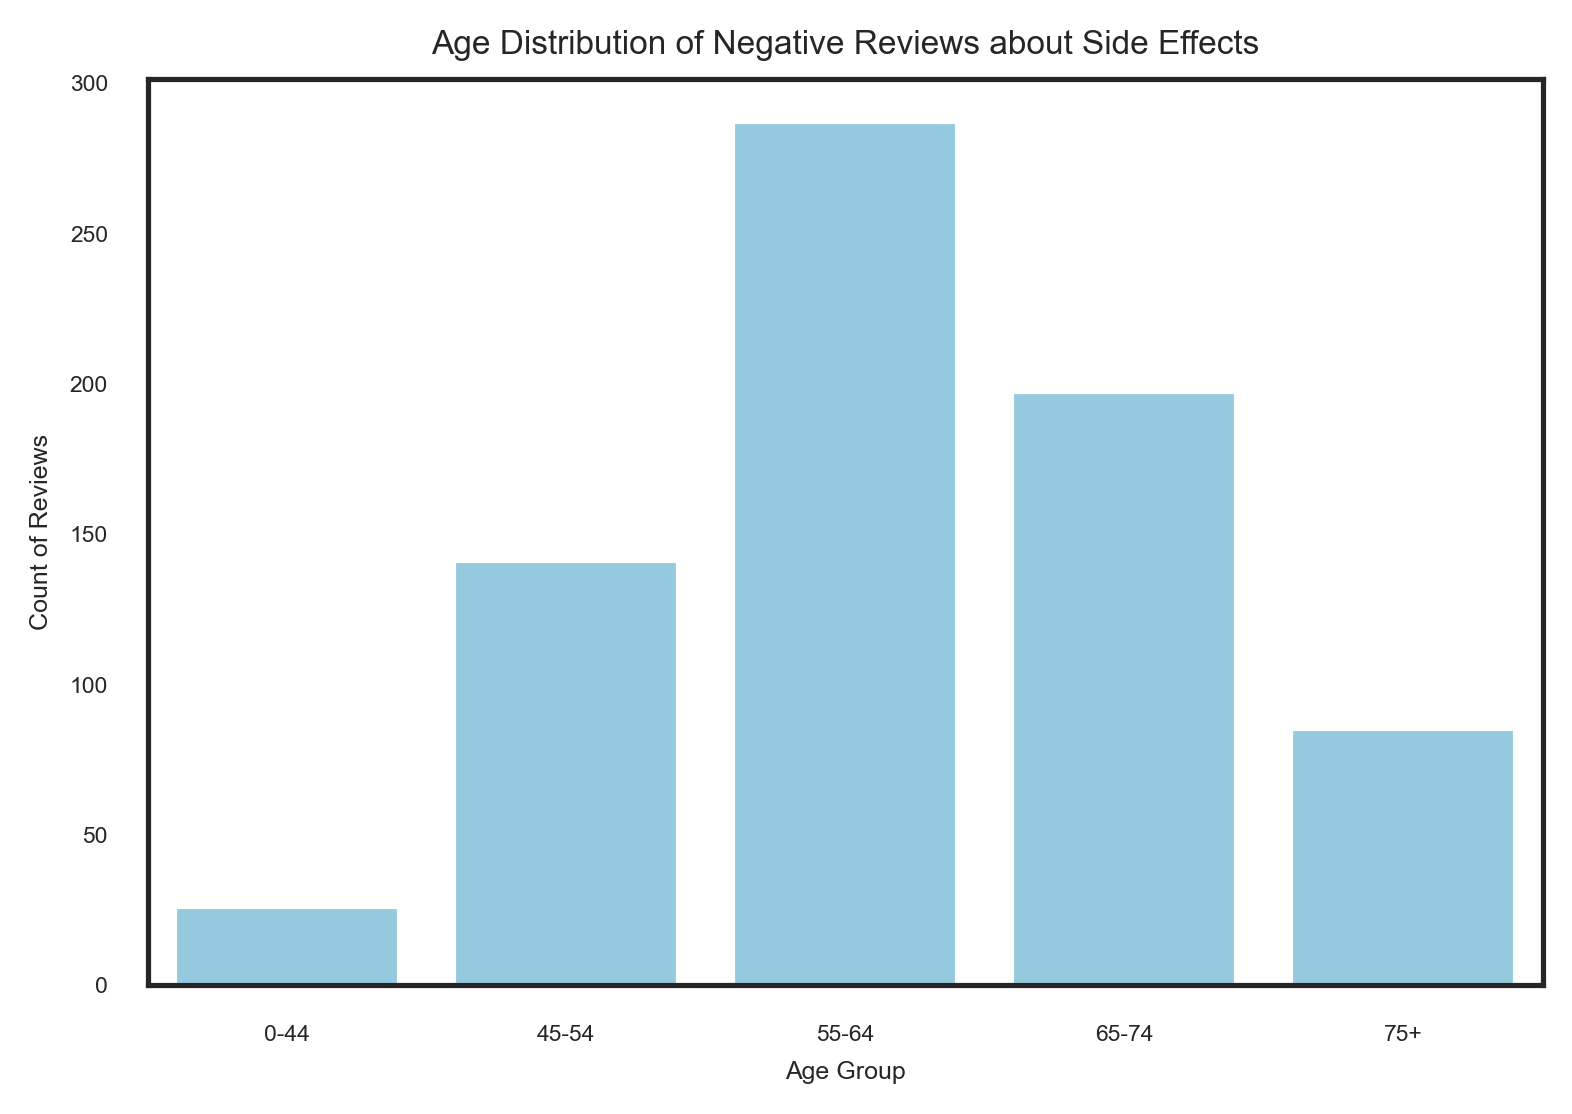

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set up parameters
#sns.set_context('paper')
sns.set(style="white",
        font_scale=0.5, 
        rc={"figure.dpi":300, 'savefig.dpi':300},
        )

#plot barchart
sns.barplot(x = 'Age Group', y = 'Count of Reviews', data = f6, color = 'skyblue')

#set title
plt.title('Age Distribution of Negative Reviews about Side Effects', fontsize=8)
# plt.show()
# #save the figure
plt.savefig('../Results/age_distribution_of_negative_reviews_side_effect.jpg')

In [55]:
df_side_pos = df_side_effects[df_side_effects["Satisfaction"]>=2]#negative reviews about side effects
df_side_pos

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,side_effect,effectiveness
1,45-54,Post-Menopausal Osteoporosis Prevention,2017-07-31,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,Male,"Stomach upset, nausea / vomiting , bloating...",0,1,0
2,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1,1,1
10,65-74,Post-Menopausal Osteoporosis Prevention,2014-06-16,menest,1792,4,4,I switched from Premarin to this medication an...,4,Female,"Stomach upset, nausea / vomiting , bloating...",0,1,0
11,55-64,Post-Menopausal Osteoporosis Prevention,2008-02-13,"menostar patch, transdermal weekly",91304,5,5,I have been on menostar for three years and lo...,5,Female,Skin redness/irritation at the application si...,2,1,1
12,45-54,Post-Menopausal Osteoporosis Prevention,2018-02-20,"minivelle patch, transdermal semiweekly",162872,4,4,My first month on Minivelle patch was good. No...,2,,Skin redness/irritation at the application si...,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,65-74,Post-Menopausal Osteoporosis Prevention,2010-02-12,calcium 600 with soy,74961,5,5,I started taking this more than 10 years ago a...,5,Female,,1,1,1
1350,45-54,Post-Menopausal Osteoporosis Prevention,2010-11-23,"calcium 600 mg (1,500 mg) tablet",4155,2,1,"This is my only new mediciation, but I am noti...",2,Female,Constipation and upset stomach may occur.,3,1,0
1352,55-64,Osteoporosis,2010-11-15,calcium 600 + vitamin d,93224,4,5,The only thing I have to say against these tab...,4,Female,Constipation or stomach upset may occur.,11,1,0
1353,55-64,Osteoporosis,2016-03-16,calcium 500 + vitamin d,151589,4,4,Just started taking this a month ago. Definite...,4,,Constipation or stomach upset may occur.,1,1,0


In [56]:
#age distribution of negative reviews about effectiveness
f7  = df_side_pos.groupby("Age").count().reset_index()[["Age", "side_effect"]]
f7 = f7.iloc[1:]
f7.columns=["Age Group","Count of Reviews"]
f7

,Age Group,Count of Reviews
1,0-44,20
2,45-54,124
3,55-64,244
4,65-74,137
5,75+,38


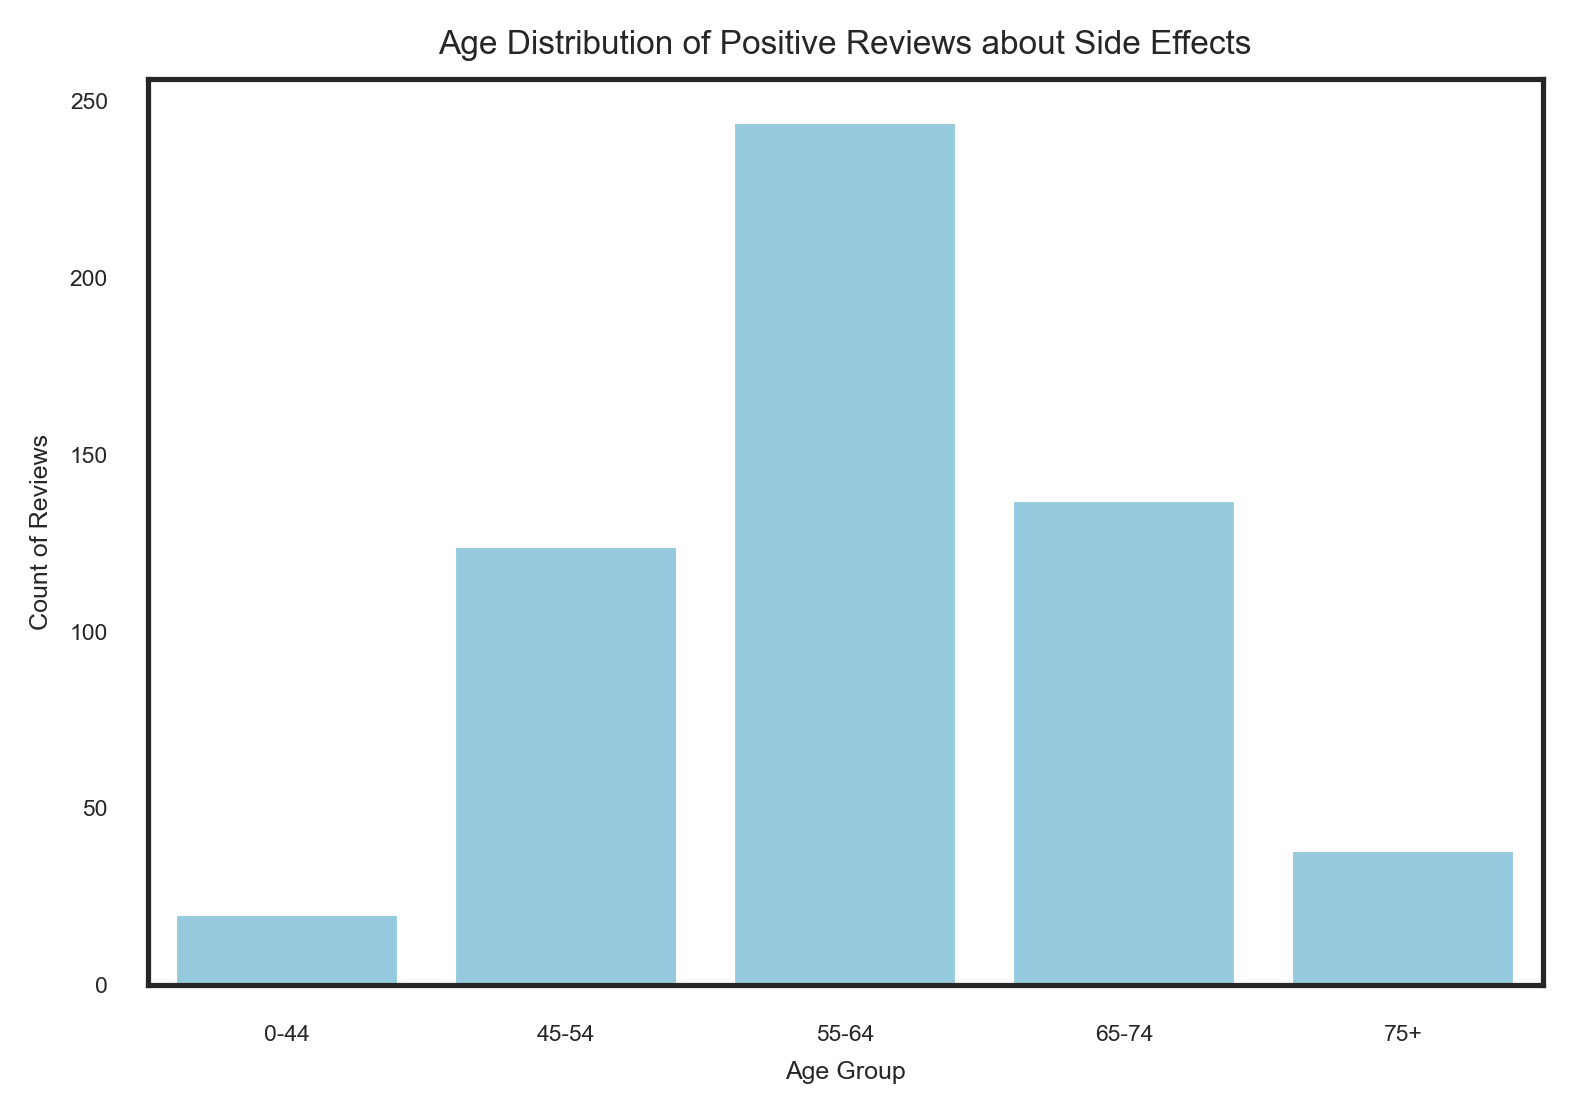

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set up parameters
#sns.set_context('paper')
sns.set(style="white",
        font_scale=0.5, 
        rc={"figure.dpi":300, 'savefig.dpi':300},
        )

#plot barchart
sns.barplot(x = 'Age Group', y = 'Count of Reviews', data = f7, color = 'skyblue')

#set title
plt.title('Age Distribution of Positive Reviews about Side Effects', fontsize=8)
# plt.show()
# #save the figure
plt.savefig('../Results/age_distribution_of_positive_reviews_side_effect.jpg')

In [58]:
#stacked positive and negative reviews about side effects across age groups
f6_tmp = f6.copy()
f6_tmp.columns = ["Age Group", "Count of Negative Reviews"]

f7_tmp = f7.copy()
f7_tmp.columns = ["Age Group", "Count of Positive Reviews"]

f11 = pd.merge(f6_tmp,f7_tmp, on="Age Group", how="outer")
f11

,Age Group,Count of Negative Reviews,Count of Positive Reviews
0,0-44,26,20
1,45-54,141,124
2,55-64,287,244
3,65-74,197,137
4,75+,85,38


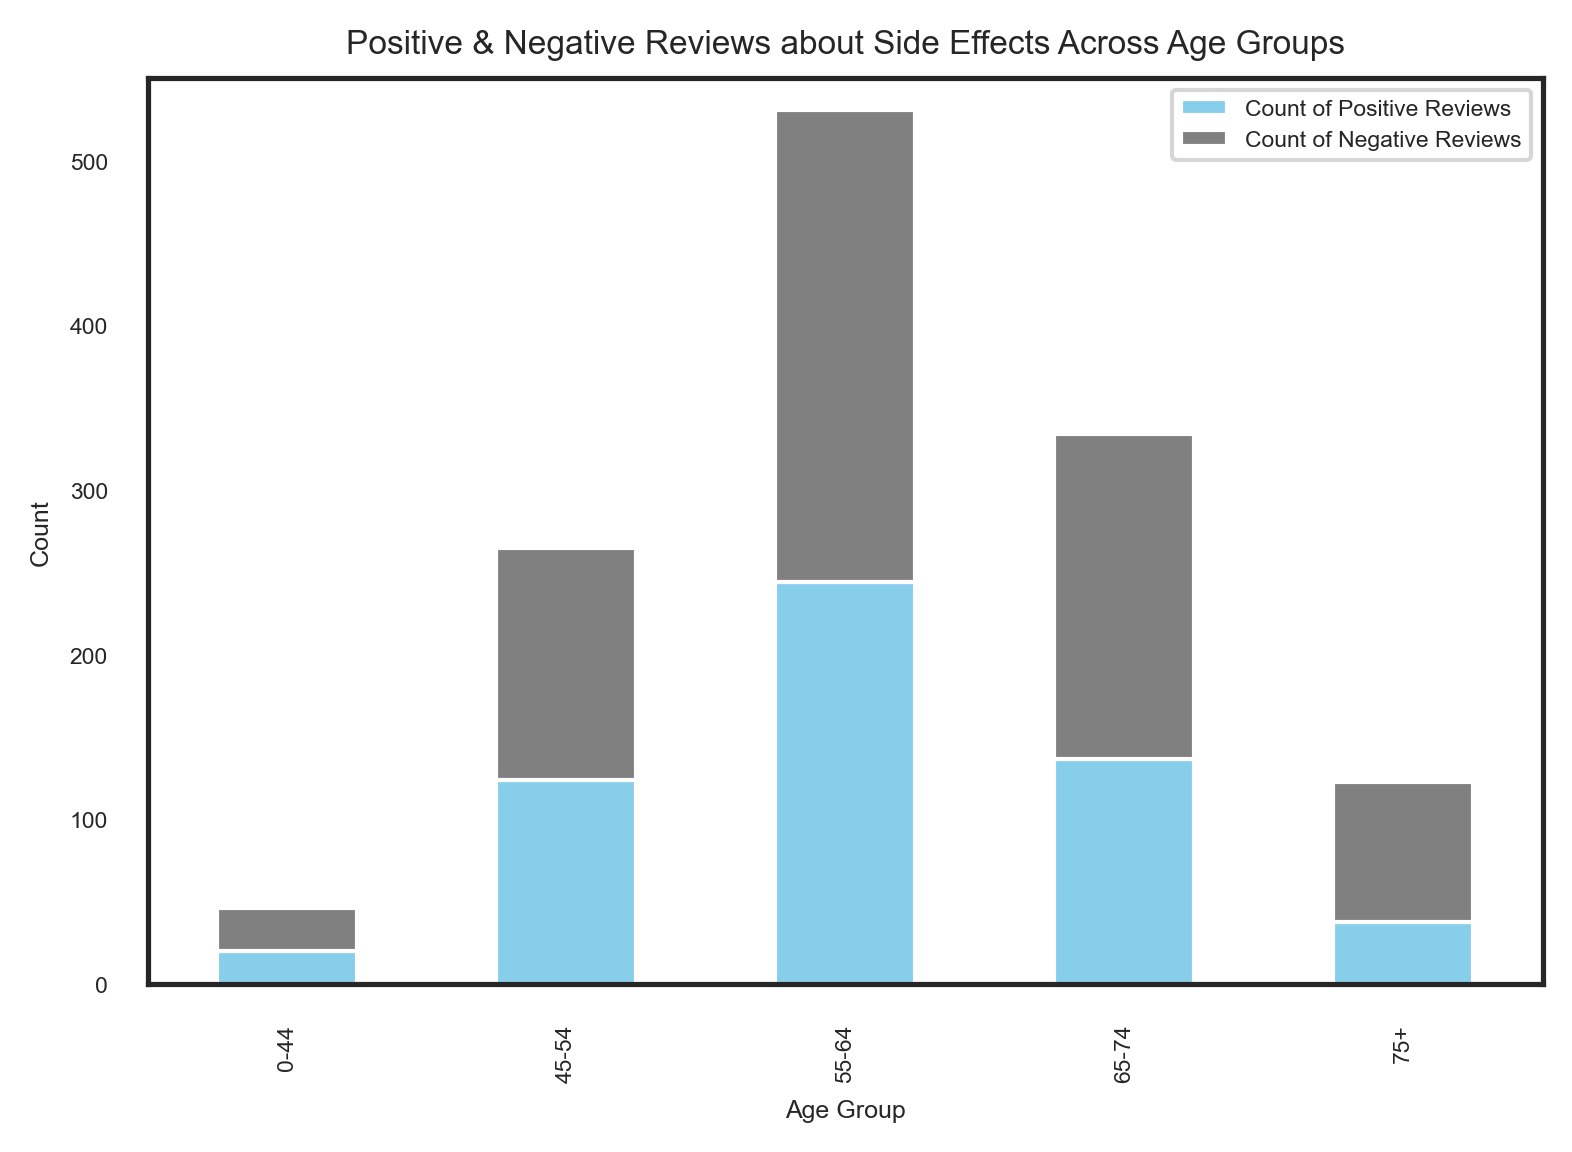

In [72]:
f11.plot(kind="bar", x="Age Group", y=["Count of Positive Reviews", "Count of Negative Reviews"], stacked=True, color=["skyblue", "gray"])
plt.title("Positive & Negative Reviews about Side Effects Across Age Groups", fontsize=8)
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.ylim(0, 550)
plt.savefig("../Results/pos&neg_reviews_about_side_effects_across_ages.png")

### Positive & Negative Reviews about Side Effects for Top 5 Drugs

In [60]:
top5 = ["reclast bottle, infusion",
"prolia syringe",
"actonel tablet osteoporosis agents",
"fosamax",
"atelvia"]

In [61]:
#count of positive reviews about side effects across different age groups and top 5 drugs
df_side_pos_5 = df_side_pos[df_side_pos["Drug"].isin(top5)]
df_side_pos_5 = df_side_pos_5.groupby(["Age","Drug"]).count()[["side_effect"]].reset_index()
df_side_pos_5.columns = ["Age Group", "Drug", "Count of Positive Reviews"]
df_side_pos_5 = df_side_pos_5.iloc[3:]
df_side_pos_5

,Age Group,Drug,Count of Positive Reviews
3,0-44,actonel tablet osteoporosis agents,1
4,0-44,prolia syringe,1
5,0-44,"reclast bottle, infusion",10
6,45-54,actonel tablet osteoporosis agents,8
7,45-54,atelvia,2
8,45-54,fosamax,4
9,45-54,prolia syringe,6
10,45-54,"reclast bottle, infusion",56
11,55-64,actonel tablet osteoporosis agents,18
12,55-64,atelvia,6


In [62]:
#count of negative reviews about side effects across different age groups and top 5 drugs
df_side_neg_5 = df_side_neg[df_side_neg["Drug"].isin(top5)]
df_side_neg_5 = df_side_neg_5.groupby(["Age","Drug"]).count()[["side_effect"]].reset_index()
df_side_neg_5.columns = ["Age Group", "Drug", "Count of Negative Reviews"]
df_side_neg_5 = df_side_neg_5.iloc[5:]
df_side_neg_5

,Age Group,Drug,Count of Negative Reviews
5,0-44,actonel tablet osteoporosis agents,6
6,0-44,atelvia,1
7,0-44,fosamax,3
8,0-44,prolia syringe,2
9,0-44,"reclast bottle, infusion",7
10,45-54,actonel tablet osteoporosis agents,21
11,45-54,atelvia,10
12,45-54,fosamax,8
13,45-54,prolia syringe,17
14,45-54,"reclast bottle, infusion",32


In [63]:
f8 = pd.merge(df_side_pos_5, df_side_neg_5, on=["Age Group","Drug"], how='outer')
f8 = f8.fillna(0)
f8

,Age Group,Drug,Count of Positive Reviews,Count of Negative Reviews
0,0-44,actonel tablet osteoporosis agents,1.0,6
1,0-44,prolia syringe,1.0,2
2,0-44,"reclast bottle, infusion",10.0,7
3,45-54,actonel tablet osteoporosis agents,8.0,21
4,45-54,atelvia,2.0,10
5,45-54,fosamax,4.0,8
6,45-54,prolia syringe,6.0,17
7,45-54,"reclast bottle, infusion",56.0,32
8,55-64,actonel tablet osteoporosis agents,18.0,35
9,55-64,atelvia,6.0,18


In [64]:
f8 = f8.groupby("Drug").sum().reset_index()
f8

,Drug,Count of Positive Reviews,Count of Negative Reviews
0,actonel tablet osteoporosis agents,38.0,81
1,atelvia,12.0,43
2,fosamax,20.0,44
3,prolia syringe,80.0,178
4,"reclast bottle, infusion",246.0,211


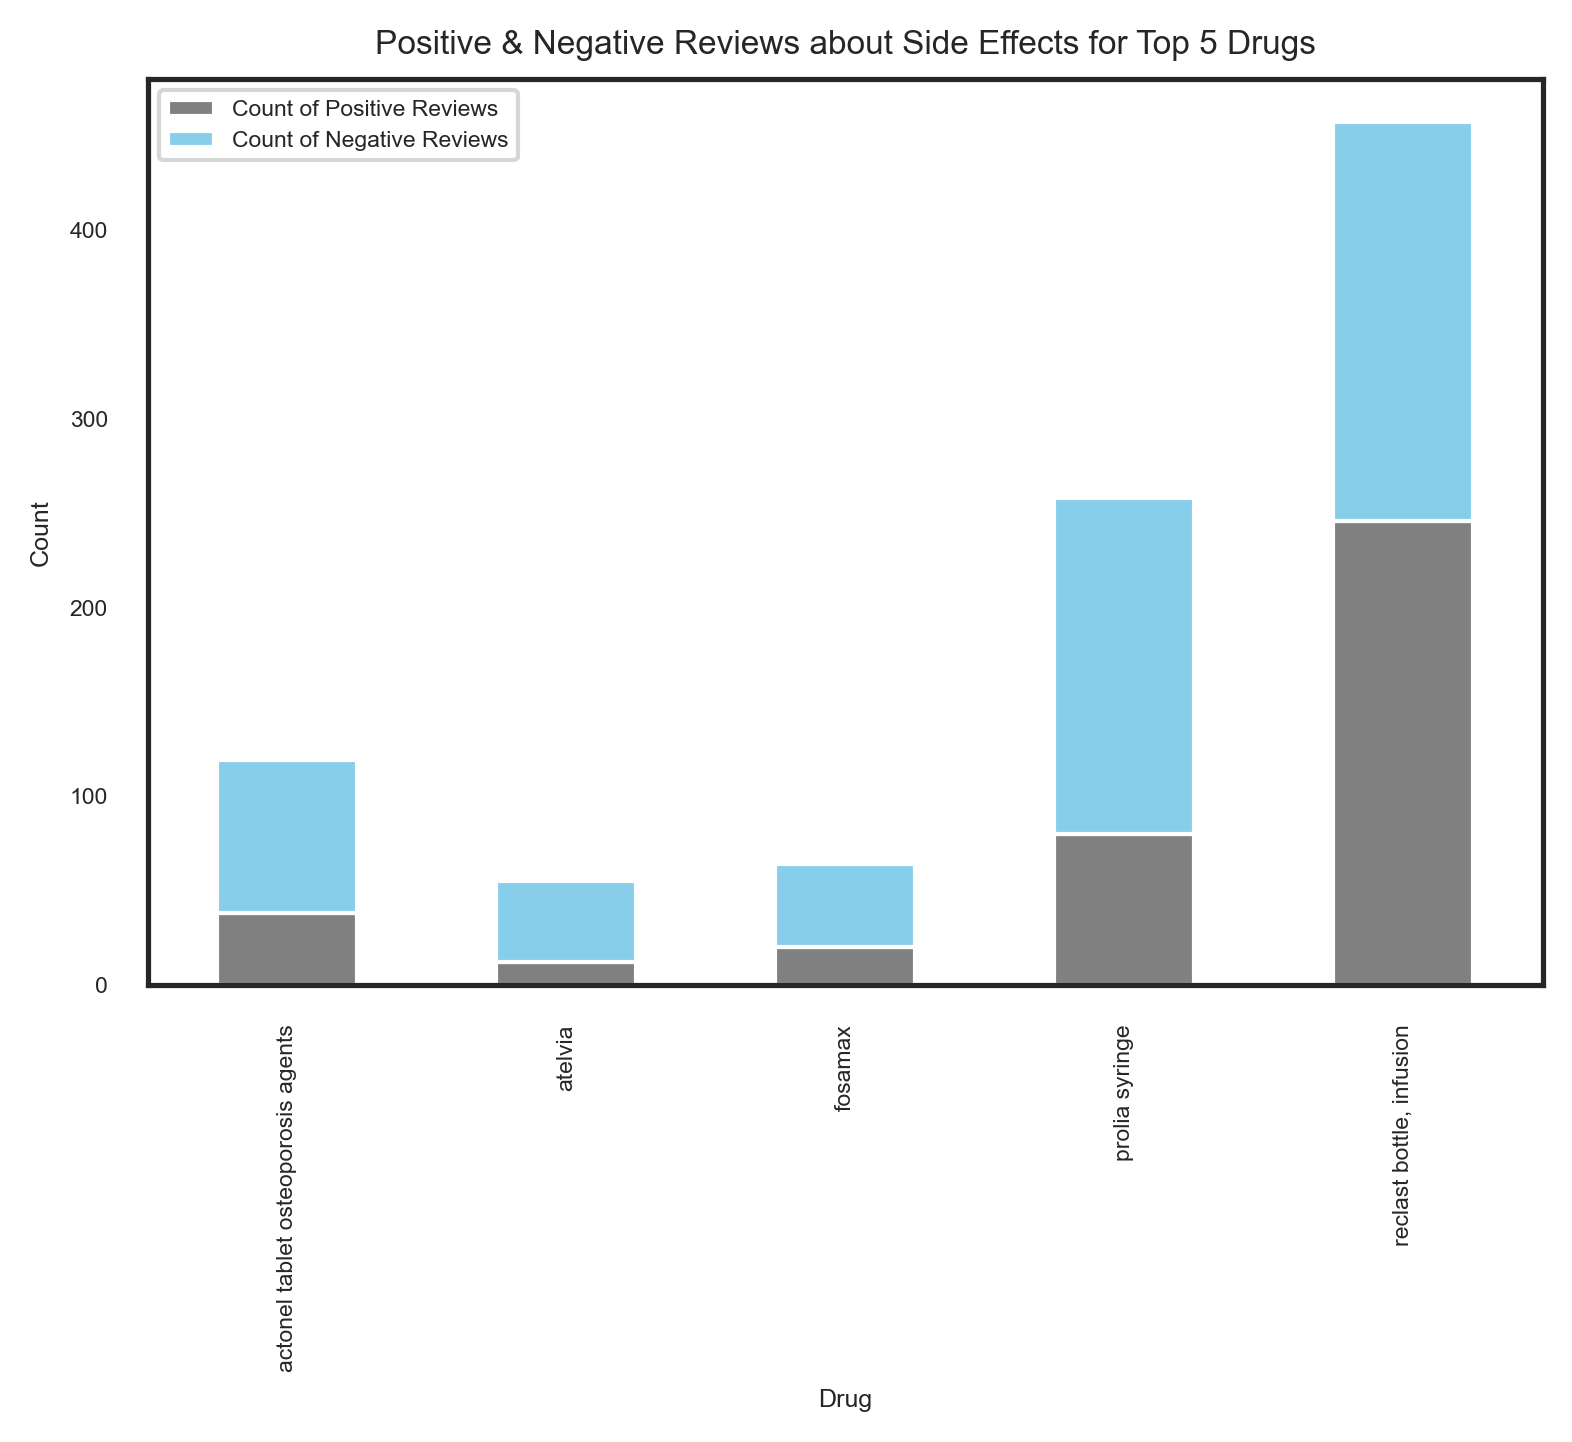

In [65]:
f8.plot(kind="bar", x="Drug", y=["Count of Positive Reviews", "Count of Negative Reviews"], stacked=True, color=["gray", "skyblue"])
plt.title("Positive & Negative Reviews about Side Effects for Top 5 Drugs", fontsize=8)
plt.ylabel("Count")
plt.xlabel("Drug")
plt.savefig("../Results/pos&neg_reviews_about_side_effects_for_top5.png")

### Positive & Negative Reviews about Effectiveness for Top 5 Drugs

In [66]:
#count of positive reviews about side effects across different age groups and top 5 drugs
df_eff_pos_5 = df_eff_pos[df_eff_pos["Drug"].isin(top5)]
df_eff_pos_5 = df_eff_pos_5.groupby(["Age","Drug"]).count()[["side_effect"]].reset_index()
df_eff_pos_5.columns = ["Age Group", "Drug", "Count of Positive Reviews"]
df_eff_pos_5 = df_eff_pos_5.iloc[2:]
df_eff_pos_5

,Age Group,Drug,Count of Positive Reviews
2,0-44,actonel tablet osteoporosis agents,1
3,0-44,fosamax,1
4,0-44,"reclast bottle, infusion",8
5,45-54,actonel tablet osteoporosis agents,4
6,45-54,atelvia,2
7,45-54,prolia syringe,6
8,45-54,"reclast bottle, infusion",46
9,55-64,actonel tablet osteoporosis agents,11
10,55-64,atelvia,5
11,55-64,fosamax,4


In [67]:
#count of negative reviews about side effects across different age groups and top 5 drugs
df_eff_neg_5 = df_eff_neg[df_eff_neg["Drug"].isin(top5)]
df_eff_neg_5 = df_eff_neg_5.groupby(["Age","Drug"]).count()[["side_effect"]].reset_index()
df_eff_neg_5.columns = ["Age Group", "Drug", "Count of Negative Reviews"]
df_eff_neg_5

,Age Group,Drug,Count of Negative Reviews
0,45-54,actonel tablet osteoporosis agents,3
1,45-54,atelvia,1
2,45-54,fosamax,1
3,45-54,prolia syringe,1
4,45-54,"reclast bottle, infusion",2
5,55-64,actonel tablet osteoporosis agents,6
6,55-64,atelvia,3
7,55-64,fosamax,6
8,55-64,prolia syringe,9
9,55-64,"reclast bottle, infusion",15


In [68]:
f9 = pd.merge(df_eff_pos_5, df_eff_neg_5, on=["Age Group","Drug"], how='outer')
f9 = f9.fillna(0)
f9

,Age Group,Drug,Count of Positive Reviews,Count of Negative Reviews
0,0-44,actonel tablet osteoporosis agents,1.0,0.0
1,0-44,fosamax,1.0,0.0
2,0-44,"reclast bottle, infusion",8.0,0.0
3,45-54,actonel tablet osteoporosis agents,4.0,3.0
4,45-54,atelvia,2.0,1.0
5,45-54,prolia syringe,6.0,1.0
6,45-54,"reclast bottle, infusion",46.0,2.0
7,55-64,actonel tablet osteoporosis agents,11.0,6.0
8,55-64,atelvia,5.0,3.0
9,55-64,fosamax,4.0,6.0


In [69]:
f9 = f9.groupby("Drug").sum().reset_index()
f9

,Drug,Count of Positive Reviews,Count of Negative Reviews
0,actonel tablet osteoporosis agents,26.0,15.0
1,atelvia,11.0,6.0
2,fosamax,11.0,12.0
3,prolia syringe,70.0,21.0
4,"reclast bottle, infusion",214.0,36.0


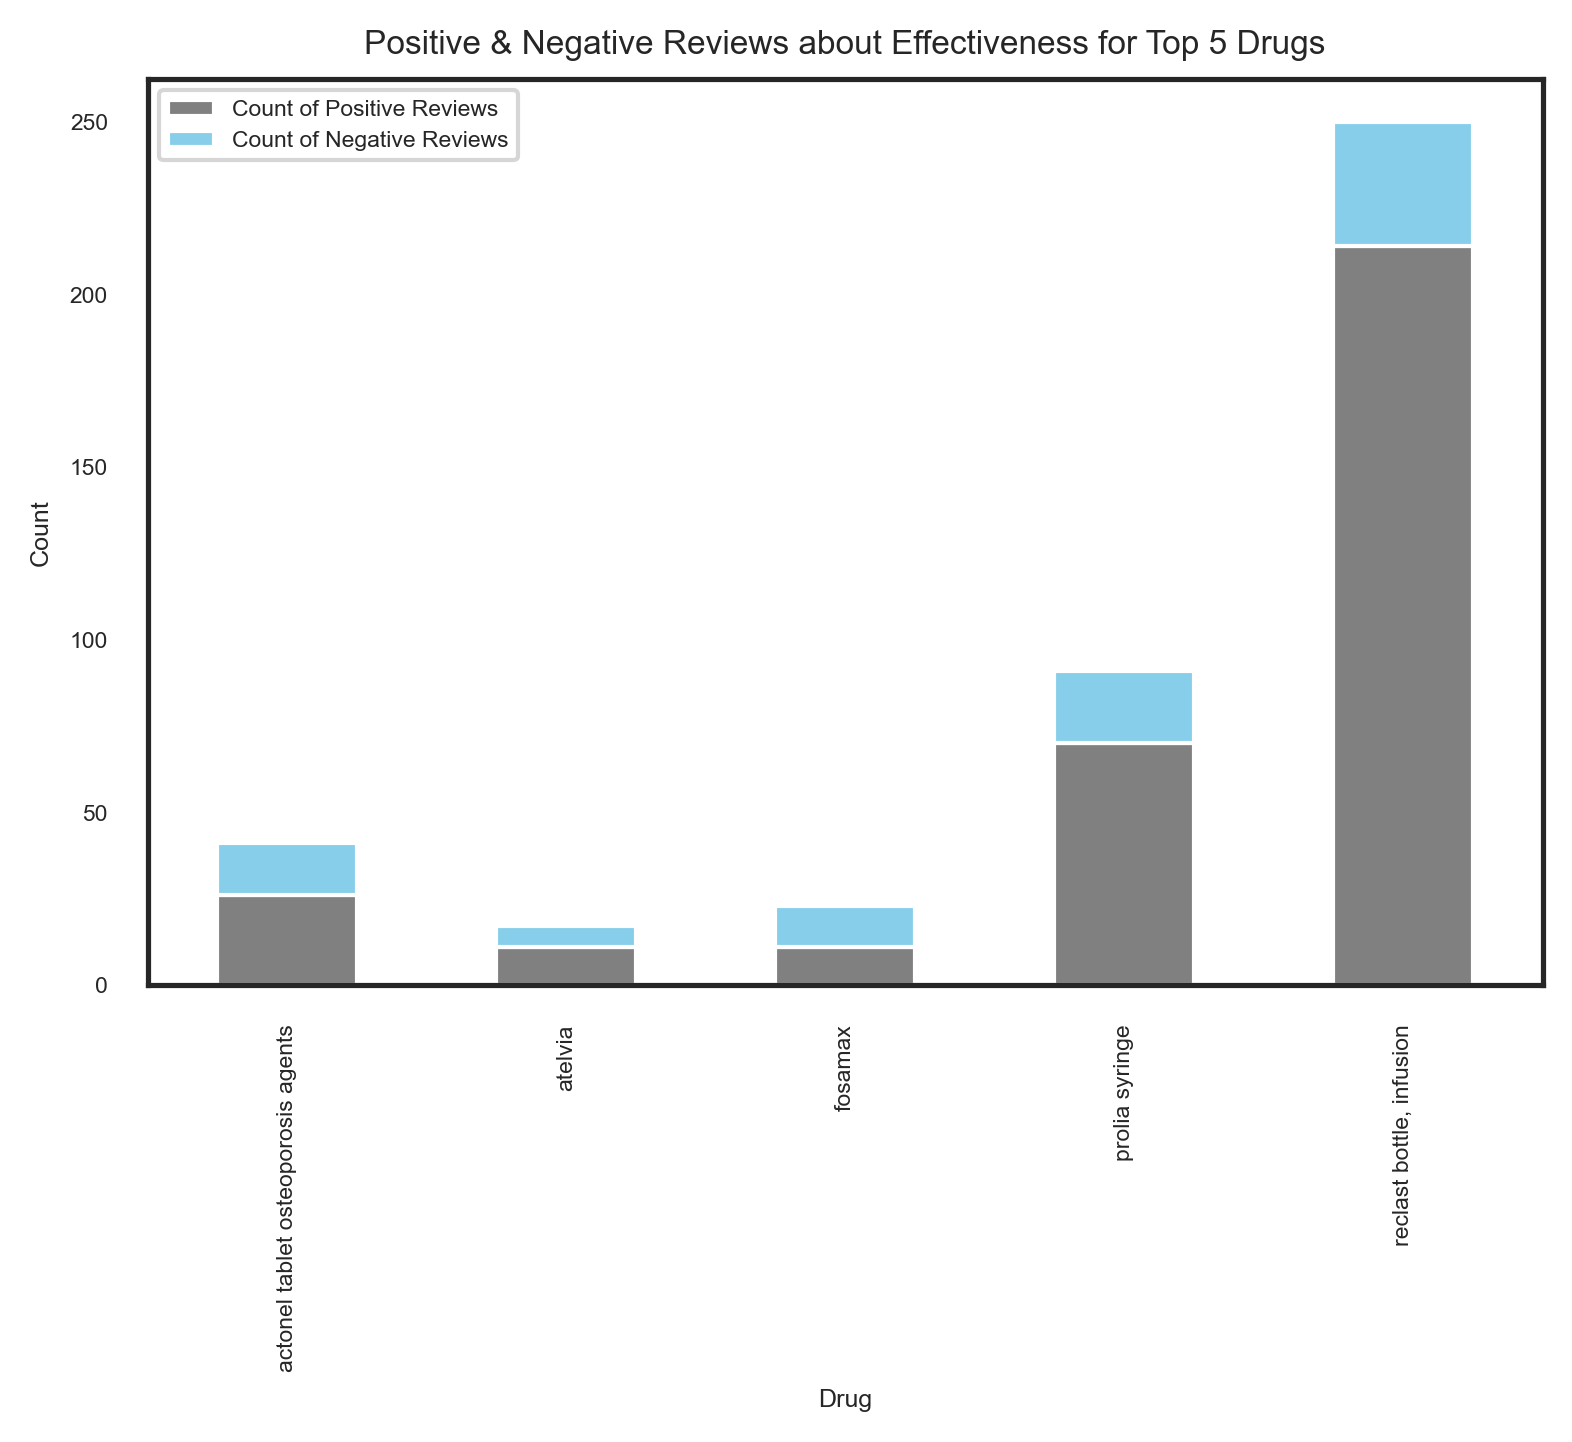

In [70]:
f9.plot(kind="bar", x="Drug", y=["Count of Positive Reviews", "Count of Negative Reviews"], stacked=True, color=["gray", "skyblue"])
plt.title("Positive & Negative Reviews about Effectiveness for Top 5 Drugs", fontsize=8)
plt.ylabel("Count")
plt.xlabel("Drug")
plt.savefig("../Results/pos&neg_reviews_about_effectiveness_for_top5.png")